In [1]:
library('igraph')
library('Matrix')
library('pracma')
library('readtext')

Warning message:
"package 'igraph' was built under R version 3.4.4"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.4.4"Warning message:
"package 'pracma' was built under R version 3.4.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu

Warning message:
"package 'readtext' was built under R version 3.4.3"

In [2]:
fbData = read.table('facebook_combined.txt', header=FALSE)

In [3]:
fbData

V1,V2
0,1
0,2
0,3
0,4
0,5
0,6
0,7
0,8
0,9
0,10


In [4]:
fbMat = data.matrix(fbData)
fbMat = fbMat + 1

In [5]:
fbMat

V1,V2
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10
1,11


In [6]:
fbGraph = graph_from_edgelist(fbMat, directed = FALSE)

In [7]:
V(fbGraph)$vid <- seq(1, vcount(fbGraph),1)

In [8]:
distMatrix = shortest.paths(fbGraph, mode = 'all') 

In [9]:
#1
is.connected(fbGraph)

[1] TRUE

In [10]:
#2
diameter(fbGraph)

[1] 8

In [11]:
ecount(fbGraph)
vcount(fbGraph)

[1] 88234

[1] 4039

[1] 43.69101

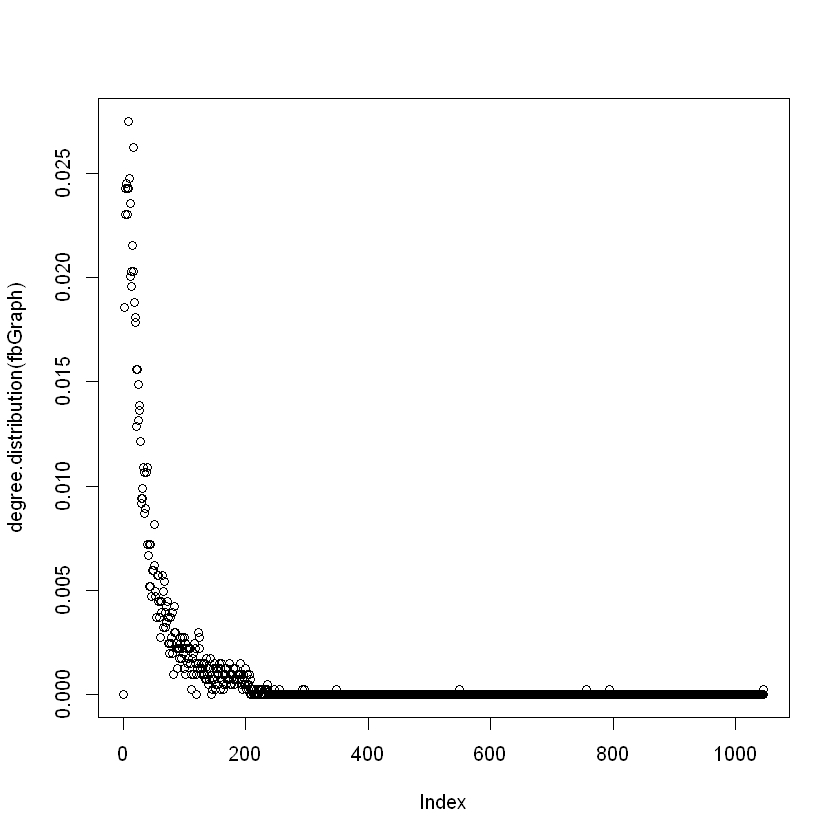

In [11]:
#3
plot(degree.distribution(fbGraph))
avgDegree = mean(degree(fbGraph))
avgDegree

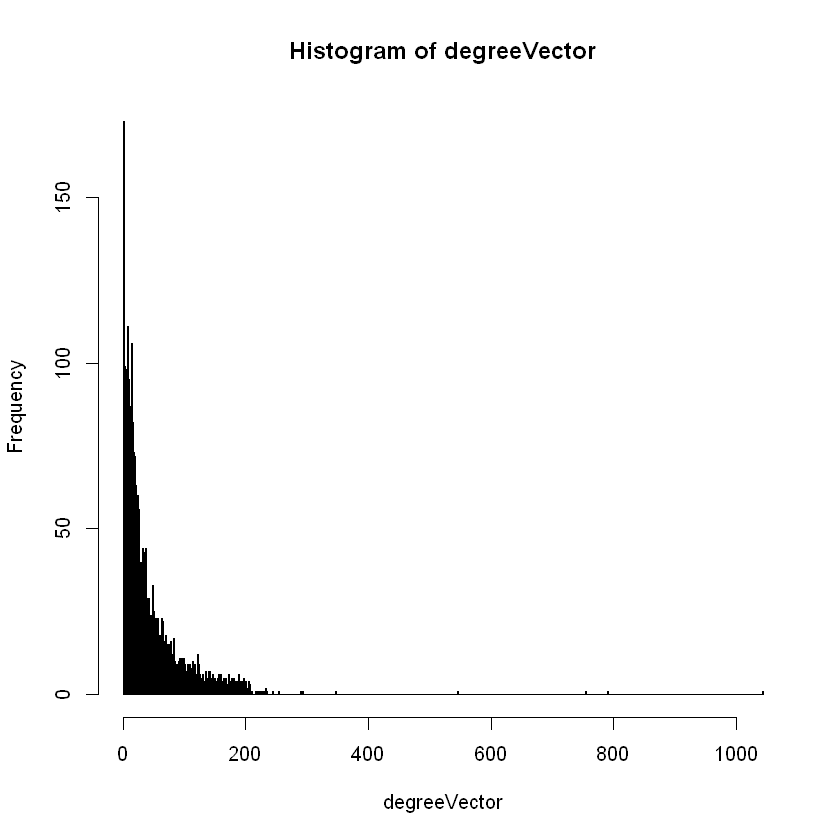


Call:
lm(formula = logY ~ logX, na.action = na.exclude)

Coefficients:
(Intercept)         logX  
      3.188       -1.189  



[1] 2.510175

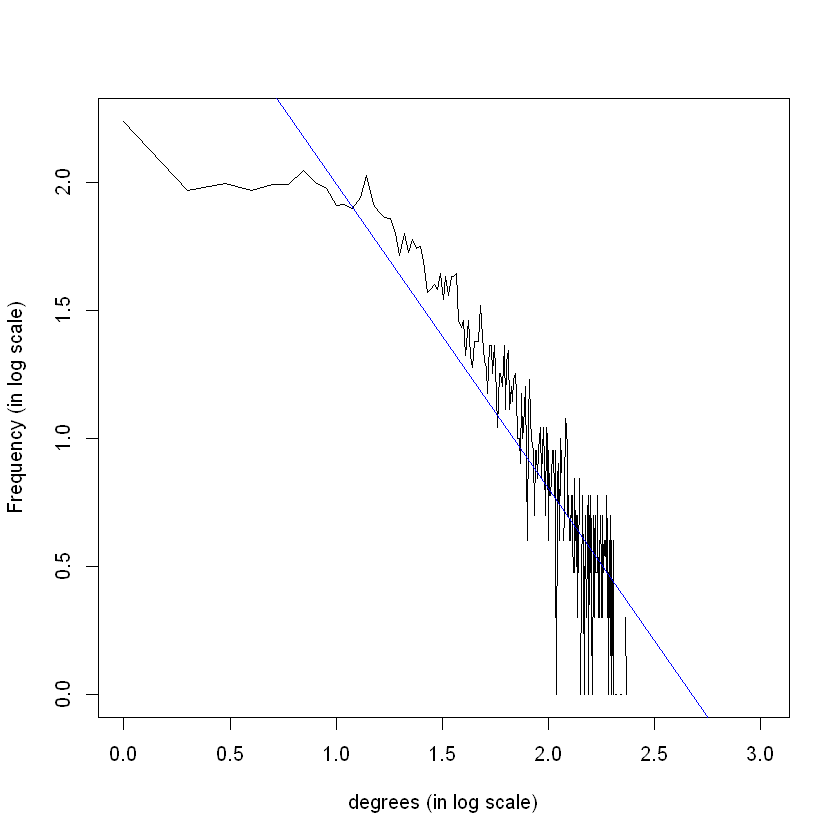

In [12]:
#3
degreeVector = degree(fbGraph)
res <- hist(degreeVector,breaks = max(degreeVector) - min(degreeVector))
    
x <- seq(from = 1, to = length(res$counts))

logX <- log10(x)
logY <- log10(res$counts)

indices = which(!is.finite(logY))
logY[indices]= NA

plot(logX, logY, type='l', xlab="degrees (in log scale)", ylab="Frequency (in log scale)")
abline(lm(logY ~ logX, na.action=na.exclude), col='blue')

print(lm(logY ~ logX, na.action=na.exclude))

gamma = fit_power_law(degreeVector)
gamma$alpha

In [9]:
fbAdList = as_adj_list(fbGraph)

In [14]:
#5
vertices_1 = fbAdList[[1]]
vertices_1 = as.list(vertices_1)
vertices_1 = c(vertices_1, 1)
length(vertices_1)
typeof(vertices_1)
#vertices_1
personalized_1 = induced.subgraph(fbGraph, vertices_1)

[1] 348

[1] "list"

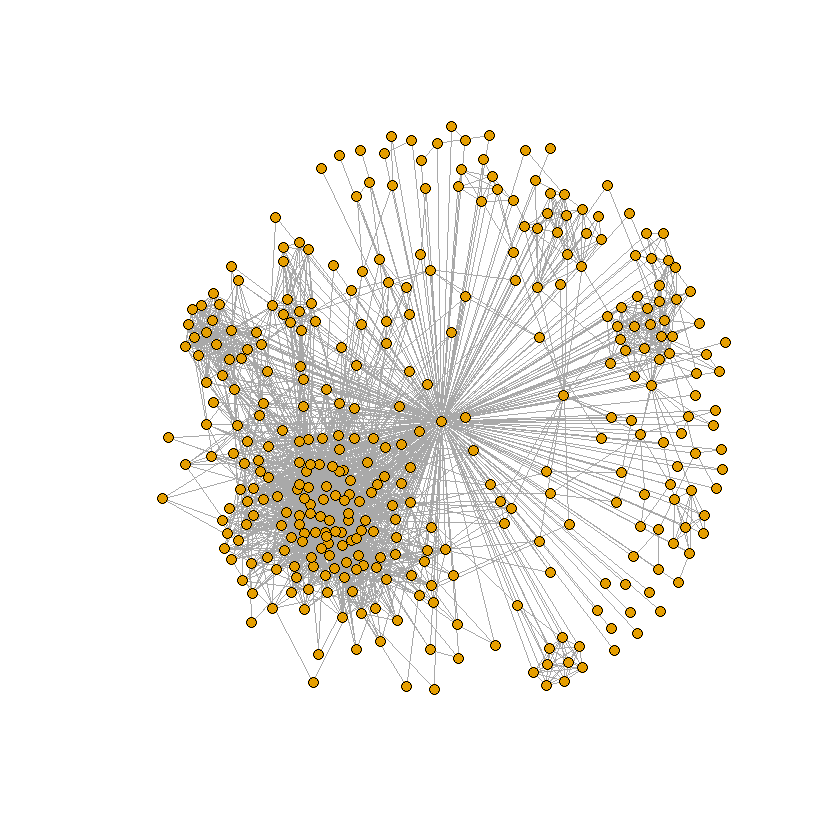

In [15]:
plot(personalized_1, vertex.label=NA, vertex.size=4)

In [16]:
ecount(personalized_1)
vcount(personalized_1)

[1] 2866

[1] 348

In [17]:
#6
diameter(personalized_1)

[1] 2

In [18]:
#7
#theoretical

In [19]:
#8
coreNodes = c()
degreeOfCoreNodes = c()
for(node in 1:vcount(fbGraph)){
    if(length(fbAdList[[node]]) > 200){
        coreNodes = c(coreNodes, node)
        degreeOfCoreNodes = c(degreeOfCoreNodes, length(fbAdList[[node]]))
    }
}

In [20]:
coreNodes

[1]    1  108  349  484 1087 1200 1353 1432 1585 1590 1664 1685 1731 1747 1769
[16] 1801 1828 1889 1913 1942 1986 1994 2048 2079 2124 2143 2207 2219 2230 2234
[31] 2241 2267 2348 2411 2465 2508 2544 2561 2612 3438

In [42]:
length(coreNodes)

[1] 40

In [21]:
degreeOfCoreNodes

[1]  347 1045  229  231  205  217  234  220  211  205  235  792  226  202  209
[16]  245  201  254  755  223  224  203  205  204  203  221  210  205  207  222
[31]  201  234  291  207  202  201  294  201  207  547

In [22]:
mean(degreeOfCoreNodes)

[1] 279.375

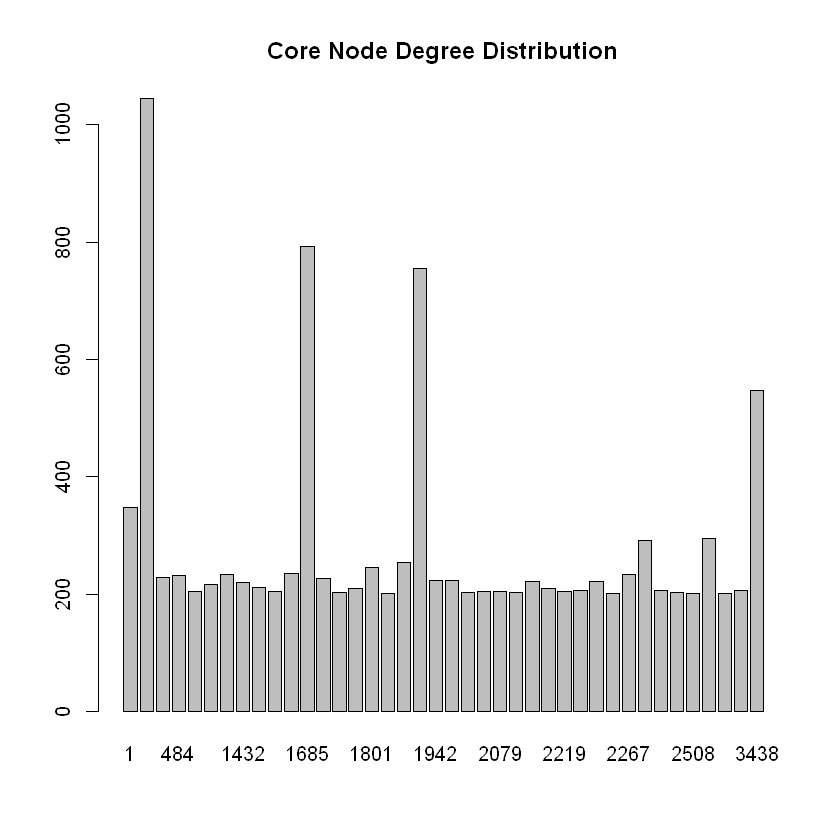

In [23]:
barplot(degreeOfCoreNodes, main="Core Node Degree Distribution", names.arg=coreNodes)

In [36]:
communityGraphs = function(personalizedGraph, communityType, coreNode){
    
    if(communityType == "FastGreedy"){
        commGraph = fastgreedy.community(personalizedGraph)
    }
    if(communityType == "EdgeBetweenness"){
        commGraph = edge.betweenness.community(personalizedGraph)
    }
    if(communityType == "Infomap"){
        commGraph = infomap.community(personalizedGraph)
    }
    
    print(paste(communityType,"for Core Node: ", coreNode))
    print(sizes(commGraph))
    print("Modularity:")
    print(modularity(commGraph))
    
    colors = rainbow(max(membership(commGraph))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(personalizedGraph)$color = nodes_colors[membership(commGraph)] 
    V(personalizedGraph)$size= 5
    
    coreNodeIndex = -1
    for(i in 1:vcount(personalizedGraph)){
        if(V(personalizedGraph)[i]$vid == coreNode){
            coreNodeIndex = i
            break
        }
    }
    
    if(coreNodeIndex != -1){
        print(paste("Core Node Index", coreNodeIndex))
        V(personalizedGraph)[coreNodeIndex]$color = colors[length(colors)] 
        V(personalizedGraph)[coreNodeIndex]$size = 15
    }
    
    
    plot(personalizedGraph, main=paste(communityType, coreNode), vertex.label=NA)
}

[1] "FastGreedy for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8 
114 112  22  39  31  12  10   8 
[1] "Modularity:"
[1] 0.4131014
[1] "Core Node Index 1"
[1] "EdgeBetweenness for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
155  28  34  10   8   9   1   1   1   1   5   6   2   5  16  13   1   1   2   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   9   7   1   2   3   1   2   3   1   1   1   1   1   2   2   2   1   1   1 
 41 
  1 
[1] "Modularity:"
[1] 0.3533022
[1] "Core Node Index 1"


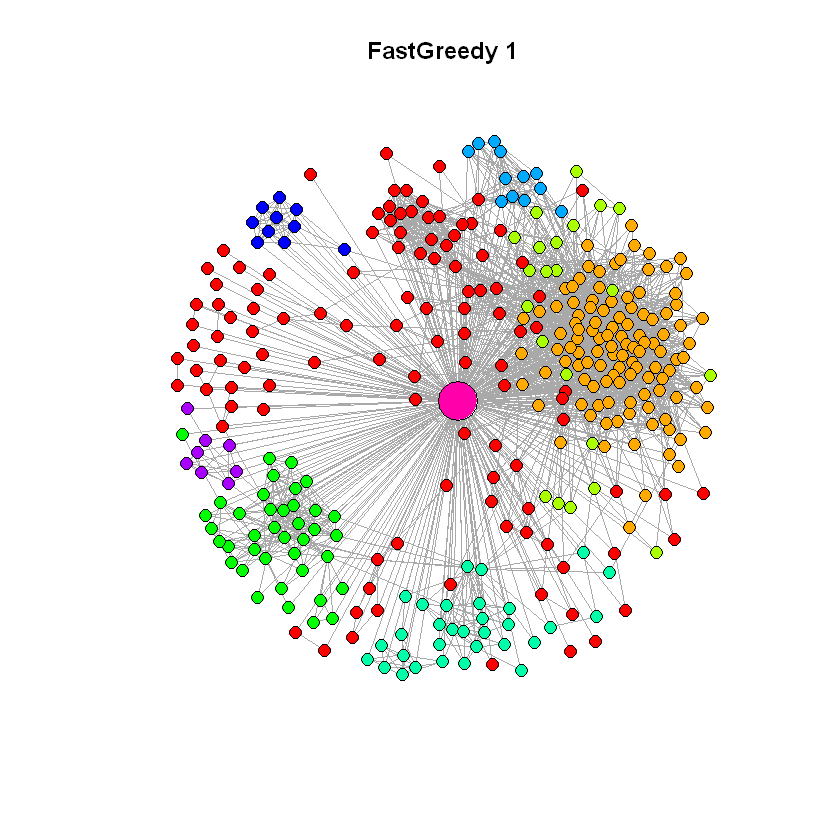

[1] "Infomap for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
142  32  21  21  16  13  10  10  11  10   9   8   7   5   6   5   3   3   2   2 
 21  22  23  24  25  26 
  2   2   2   2   2   2 
[1] "Modularity:"
[1] 0.3891185
[1] "Core Node Index 1"


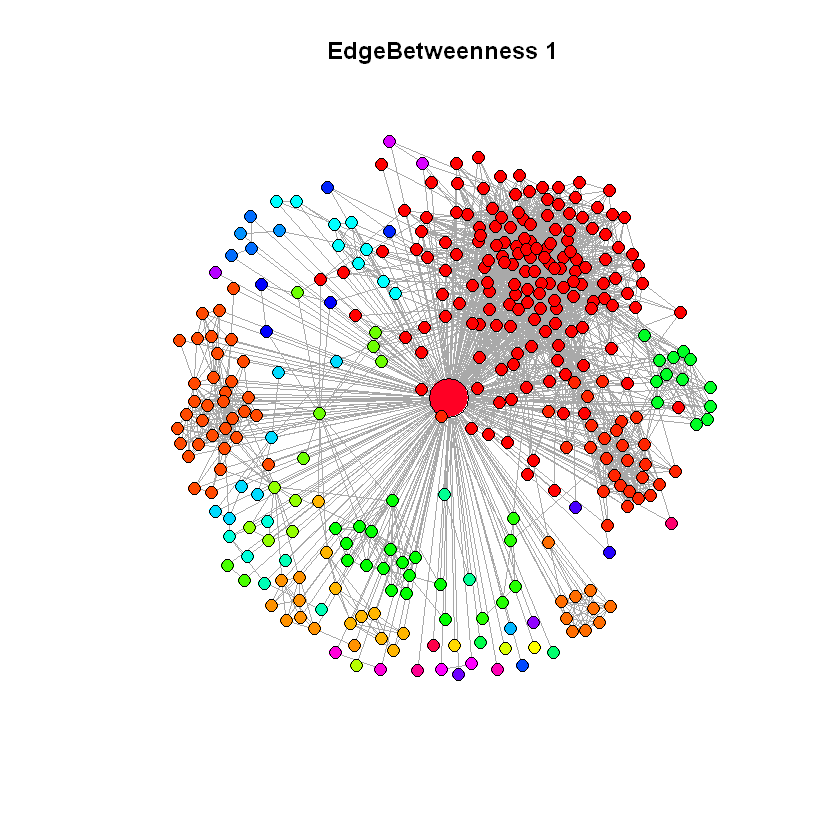

[1] "FastGreedy for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9 
464 484  70   9   5   3   6   2   3 
[1] "Modularity:"
[1] 0.4359294
[1] "Core Node Index 3"


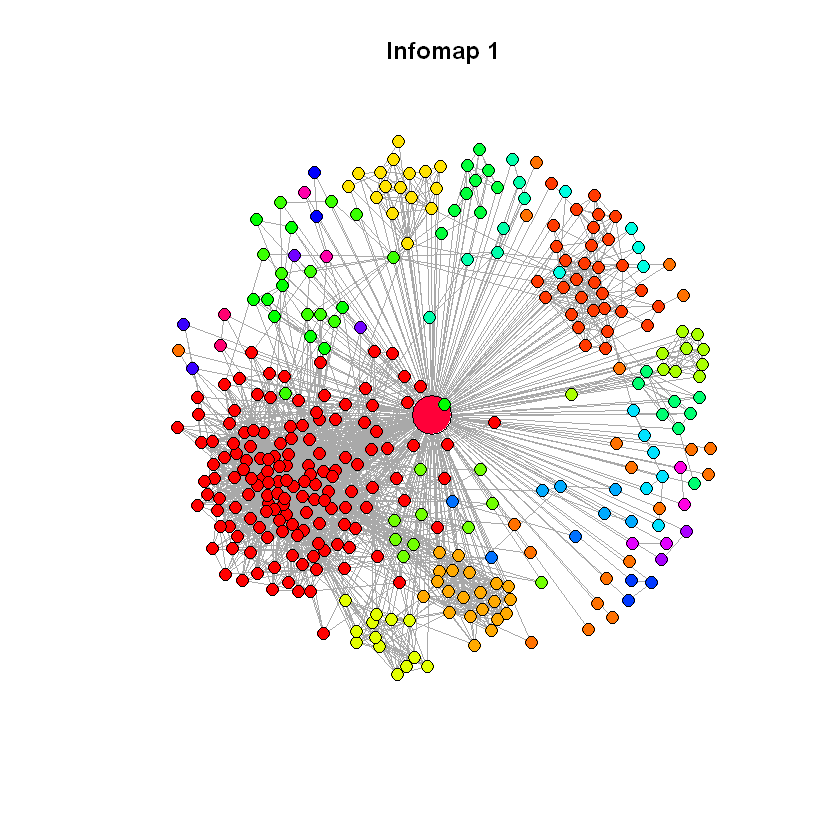

[1] "EdgeBetweenness for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  7 173 127 139 366   3  71  38   2  12   7   1   1  13   6  23   6   1   3   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   5   1   1   1   1   2   6   1   1   1   1   2   2   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52 
  1   2   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5067549
[1] "Core Node Index 3"


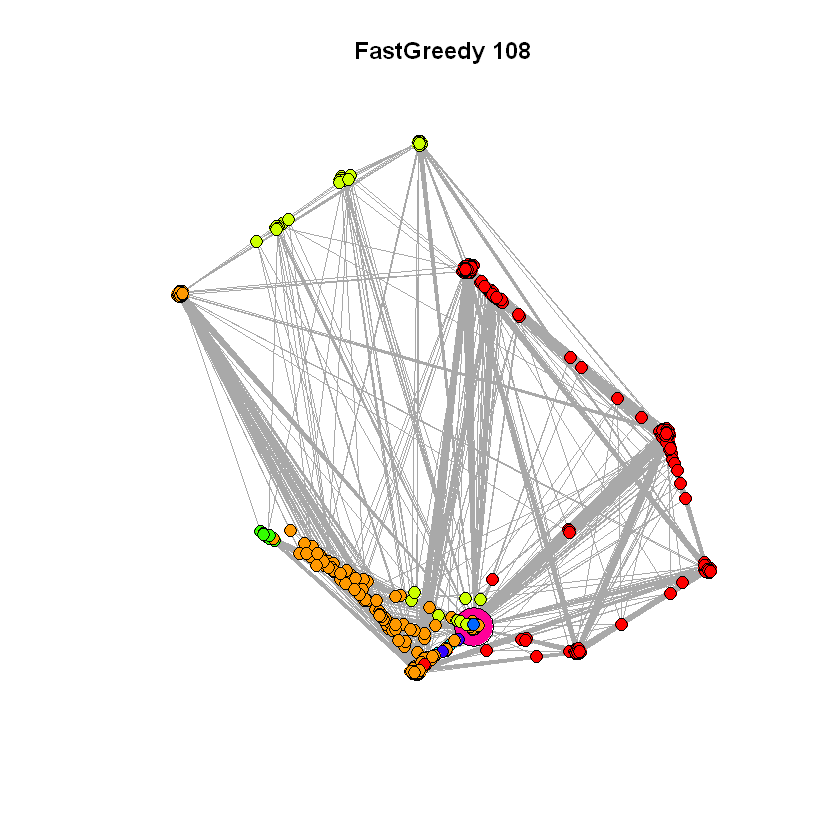

[1] "Infomap for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
323 127  93 104  71  72  48  38  29  29  18  16  12  11  10   6   6   5   6   6 
 21  22  23  24  25  26 
  3   3   3   3   2   2 
[1] "Modularity:"
[1] 0.5084282
[1] "Core Node Index 3"


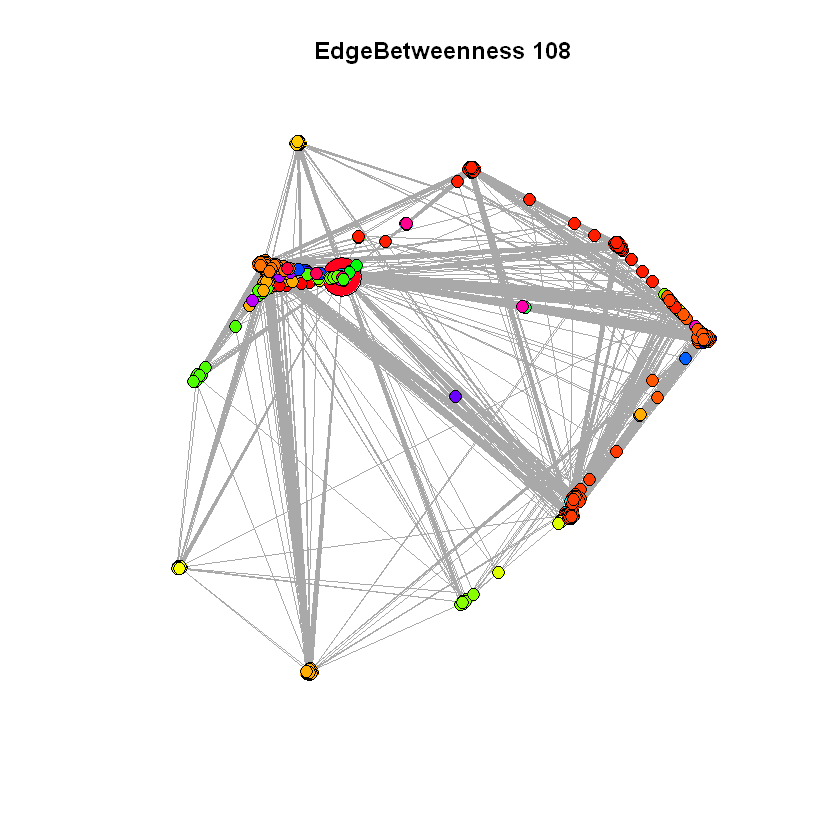

[1] "FastGreedy for Core Node:  349"
Community sizes
  1   2   3   4   5 
107  11  98   4  10 
[1] "Modularity:"
[1] 0.2517149
[1] "Core Node Index 5"


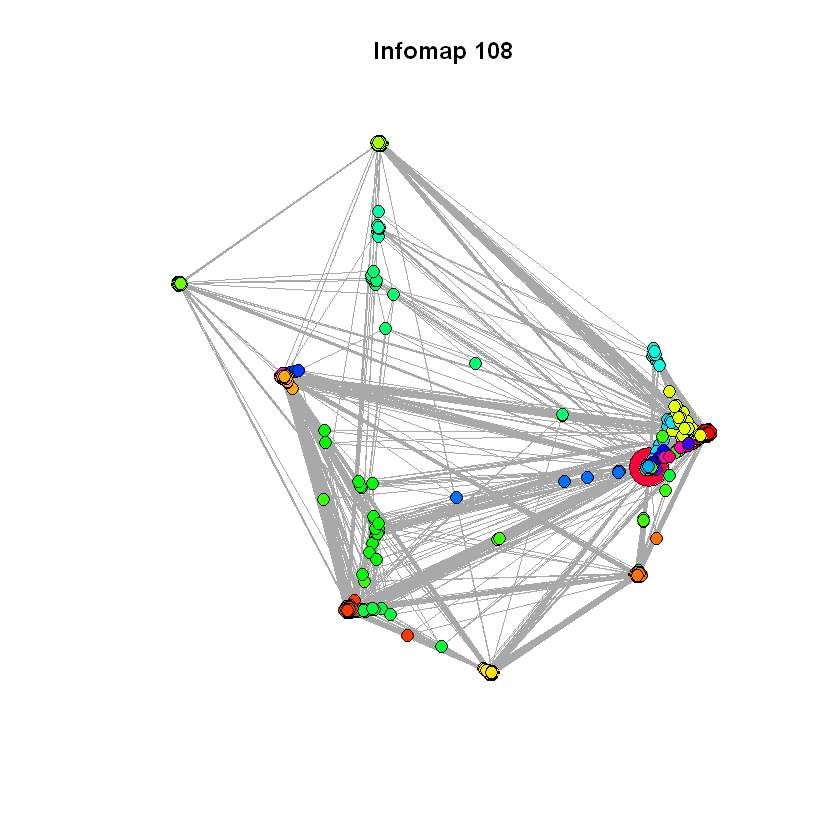

[1] "EdgeBetweenness for Core Node:  349"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1  10  86   1   1   1   1   1   2  18   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   1   3   1   2   1   1   1   1   1   7   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   3   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 104 
  1   1   1   1 
[1] "Modularity:"
[1] 0.133528
[1] "Core Node Index 5"


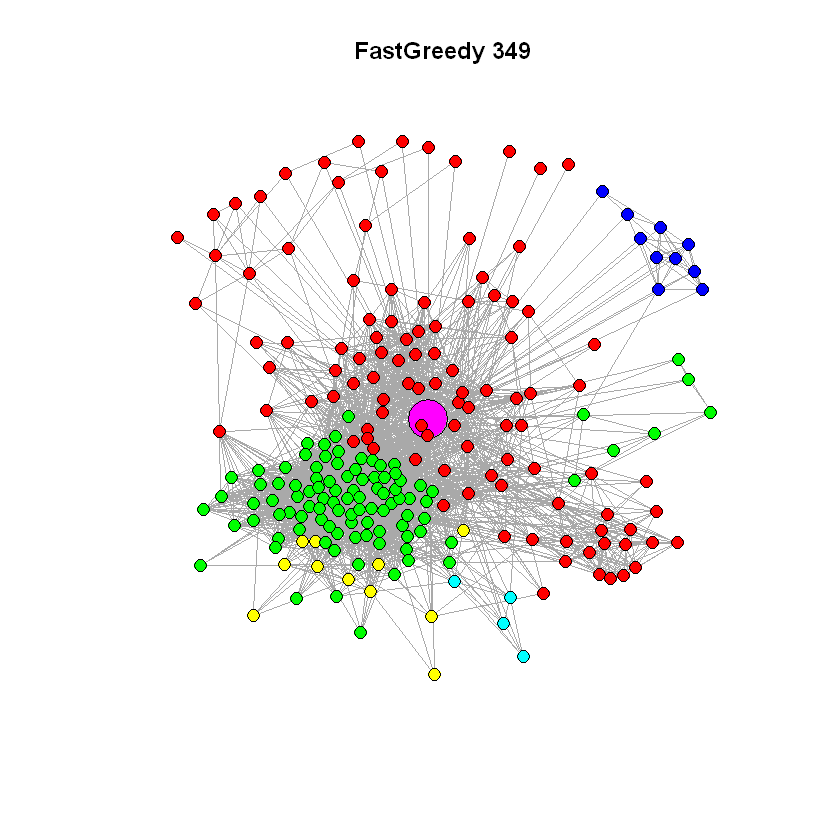

[1] "Infomap for Core Node:  349"
Community sizes
  1   2   3   4   5   6   7   8   9  10 
134  23  20  18  10  11   7   3   2   2 
[1] "Modularity:"
[1] 0.203753
[1] "Core Node Index 5"


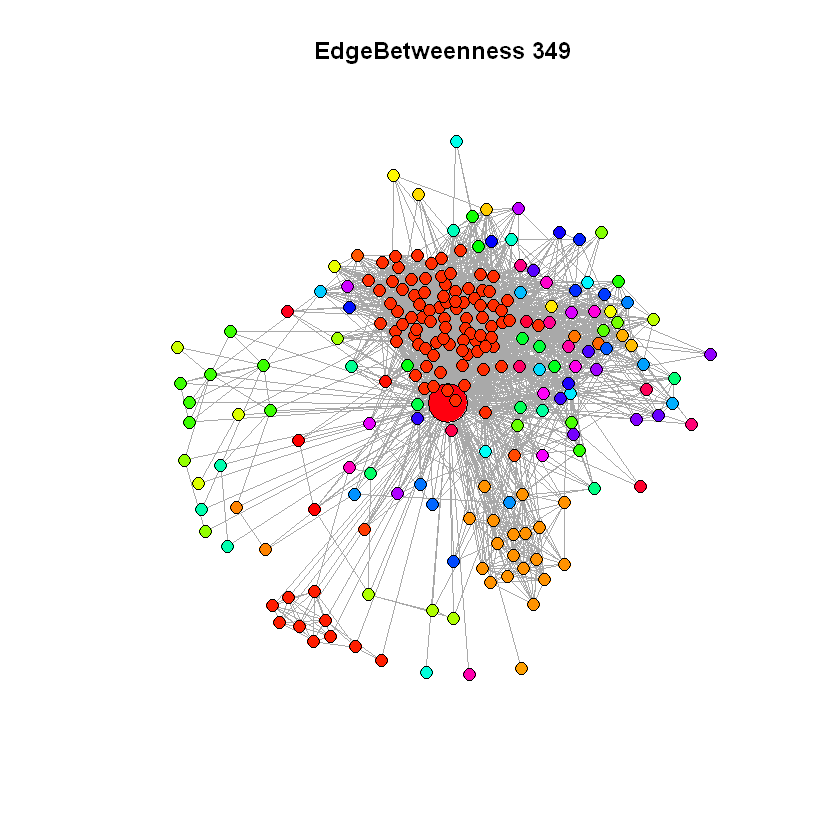

[1] "FastGreedy for Core Node:  484"
Community sizes
 1  2  3 
71 72 89 
[1] "Modularity:"
[1] 0.5070016
[1] "Core Node Index 41"


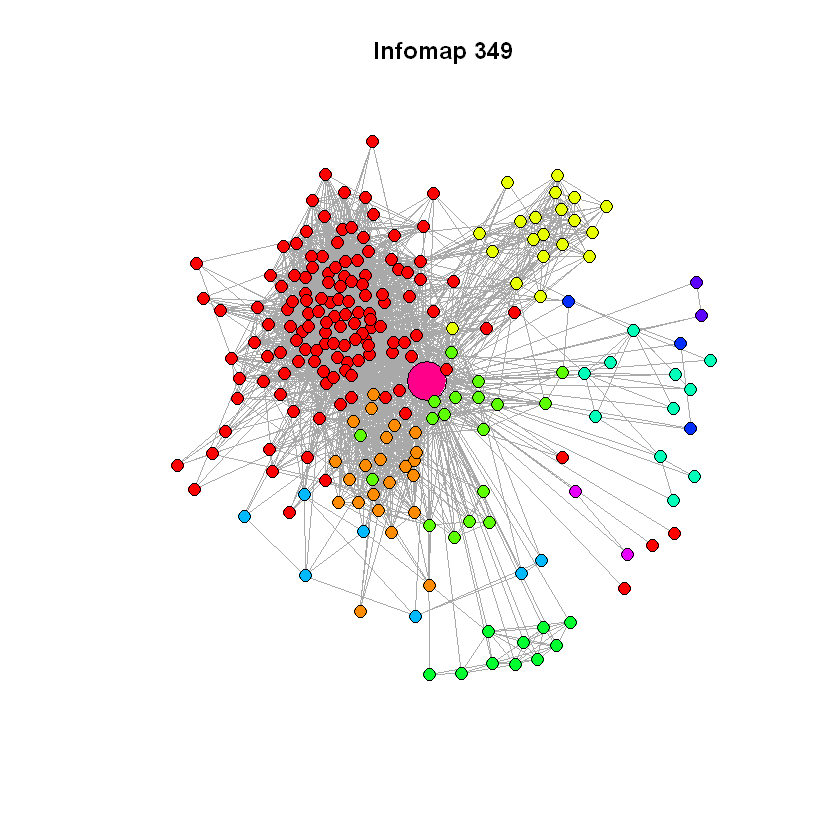

[1] "EdgeBetweenness for Core Node:  484"
Community sizes
 1  2  3  4  5  6  7  8  9 10 
77 79  1  1  1 69  1  1  1  1 
[1] "Modularity:"
[1] 0.4890952
[1] "Core Node Index 41"


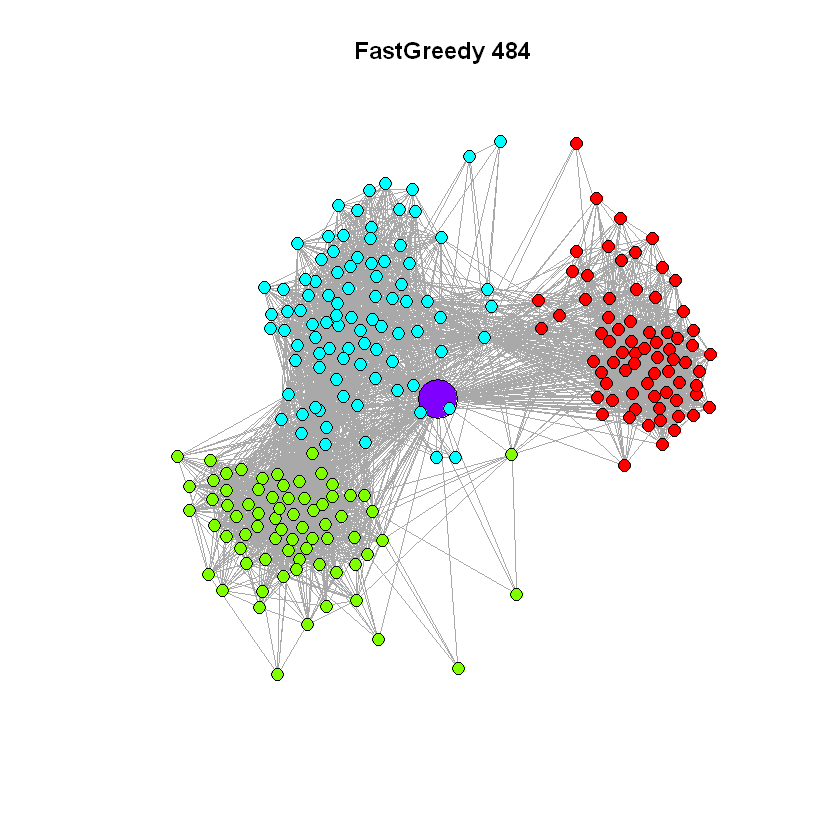

[1] "Infomap for Core Node:  484"
Community sizes
 1  2  3  4 
85 73 70  4 
[1] "Modularity:"
[1] 0.5152788
[1] "Core Node Index 41"


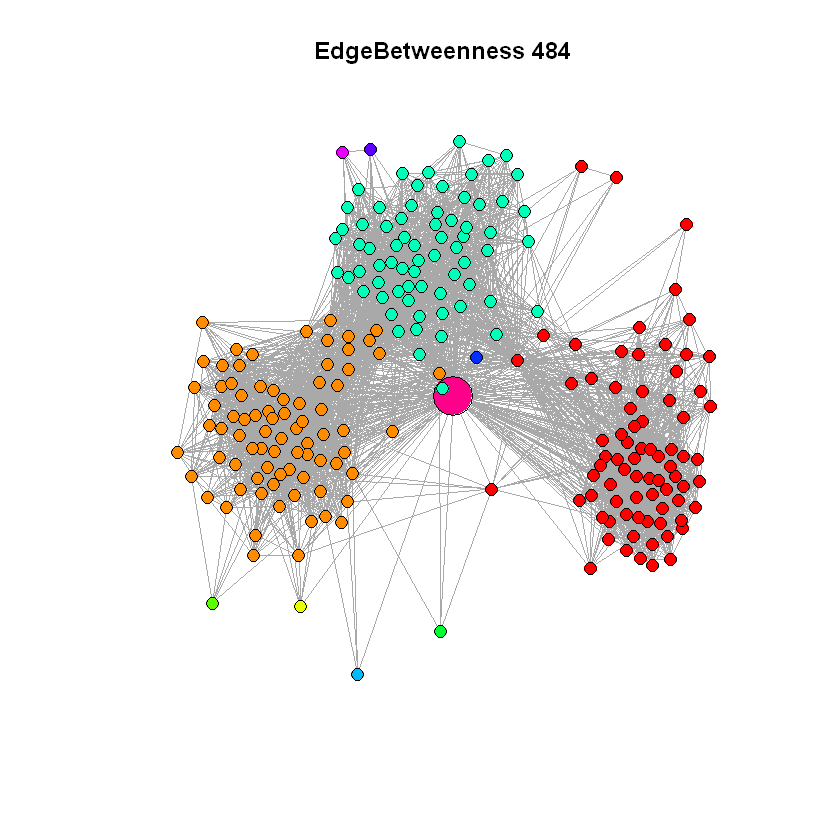

[1] "FastGreedy for Core Node:  1087"
Community sizes
  1   2 
 81 125 
[1] "Modularity:"
[1] 0.1455315
[1] "Core Node Index 38"


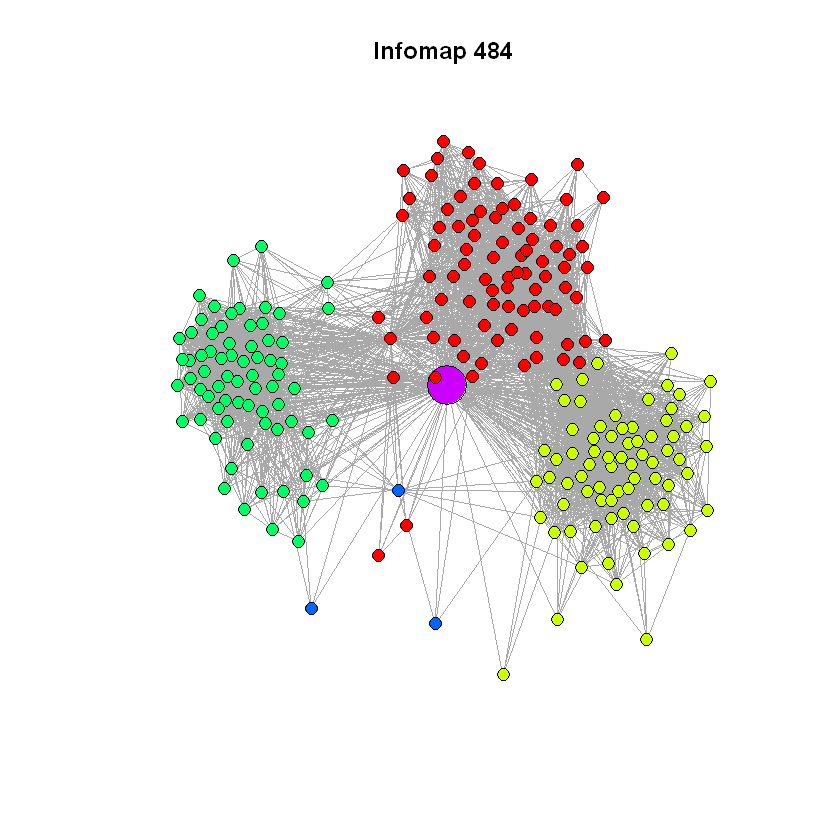

[1] "EdgeBetweenness for Core Node:  1087"
Community sizes
  1   2   3   4   5   6   7   8   9 
173  18   8   1   1   2   1   1   1 
[1] "Modularity:"
[1] 0.02762377
[1] "Core Node Index 38"


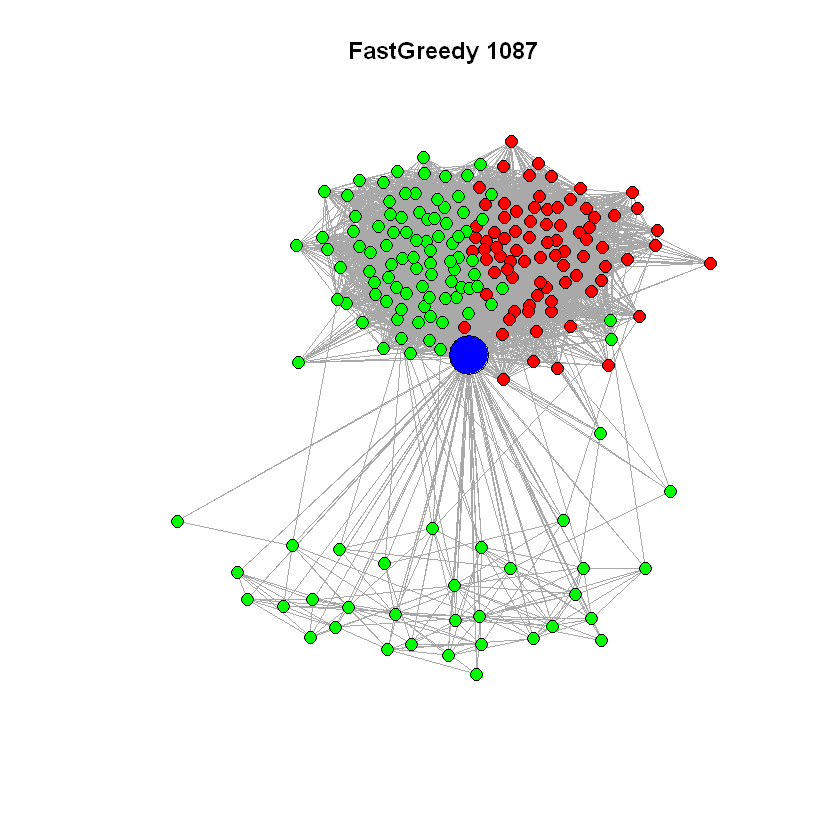

[1] "Infomap for Core Node:  1087"
Community sizes
  1   2   3   4 
175  13  11   7 
[1] "Modularity:"
[1] 0.02690662
[1] "Core Node Index 38"


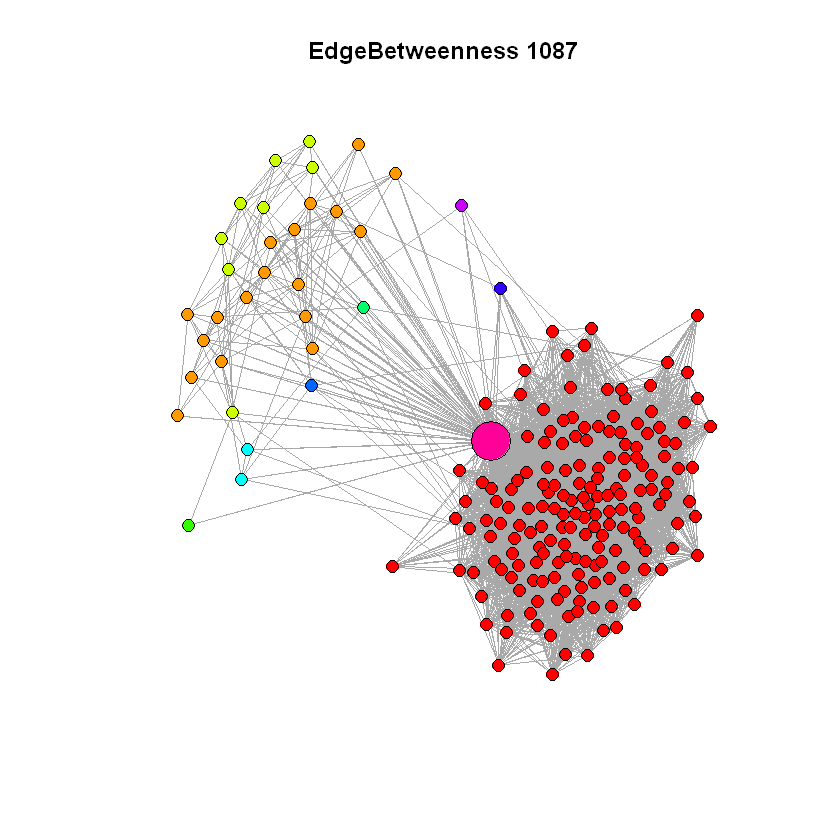

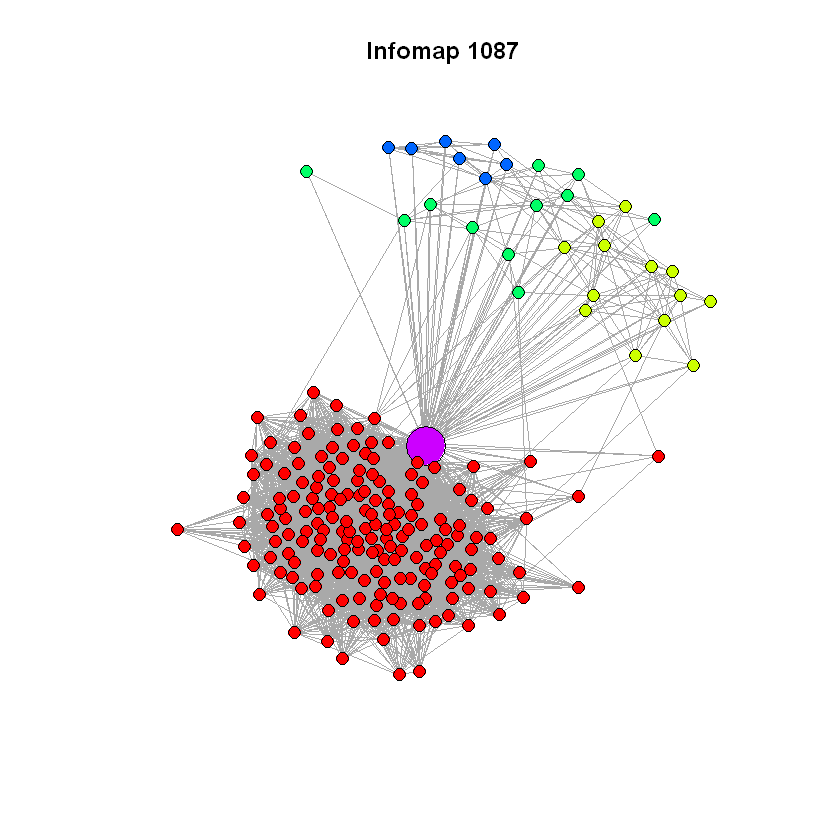

In [37]:
#9
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(1087)
for(coreNode in coreNodeList){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    vertices = c(coreNode, vertices)
    #print(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    layout = layout.fruchterman.reingold(personalizedGraph)
    #print(V(personalizedGraph)$vid)
    communityGraphs(personalizedGraph, "FastGreedy", coreNode)
    communityGraphs(personalizedGraph, "EdgeBetweenness", coreNode)
    communityGraphs(personalizedGraph, "Infomap", coreNode)
}

[1] "FastGreedy for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 52  39 121  18  52  24  10   8   3   2   2   2   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26 
  1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4418533
[1] "EdgeBetweenness for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 27  39 140  10   8   9   1   1   1   1  22   1   2   5  13   1   1   2   6   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   5   7   7   1   2   3   1   2   1   1   1   1   1   2   1   1   1   1   2 
 41  42  43  44  45  46  47  48  49  50 
  2   1   2   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4161461


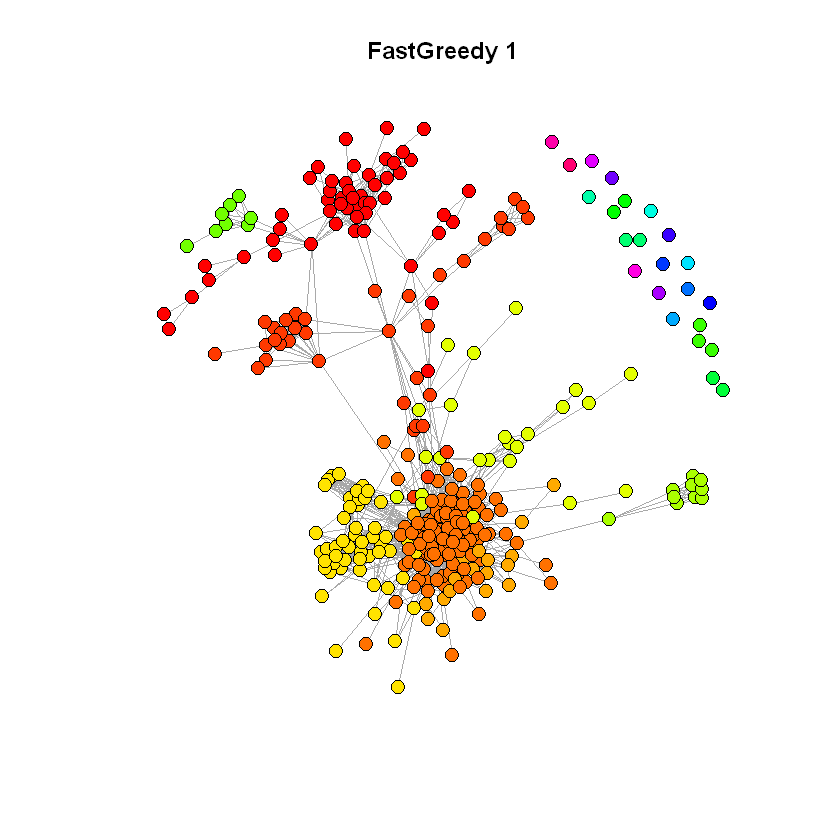

[1] "Infomap for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
143  34  21  16  13  10   9   8  11  10   9   7   6   5   5   3   2   2   2   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   3   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4180077


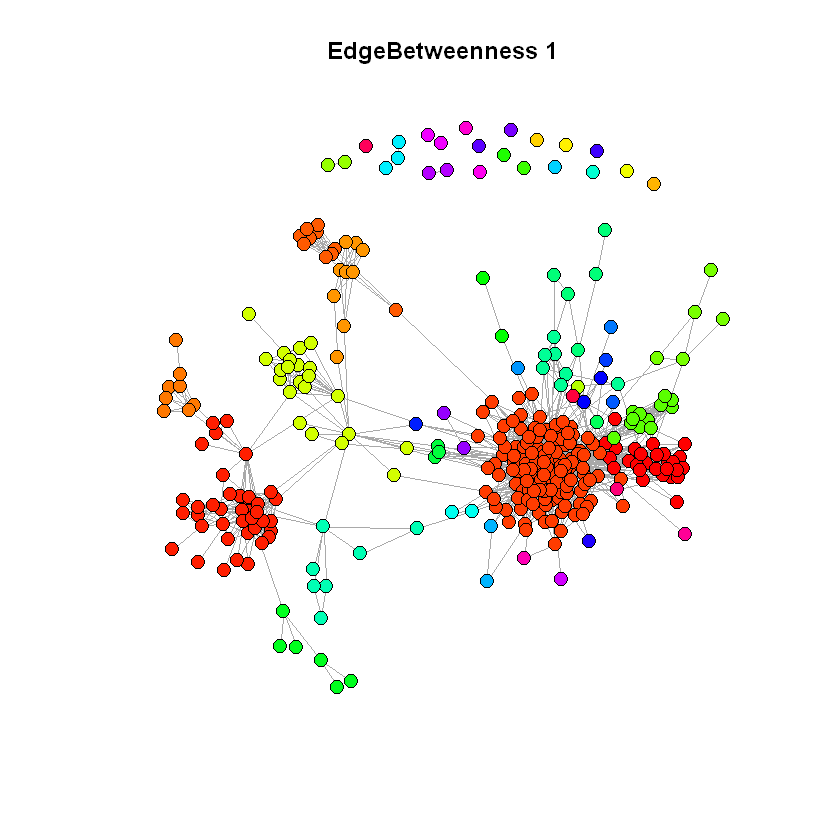

[1] "FastGreedy for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
458 465  70  19   4   3   6   2   2   3   2   1   1   1   1   1   1   1   1   1 
 21  22 
  1   1 
[1] "Modularity:"
[1] 0.4581271


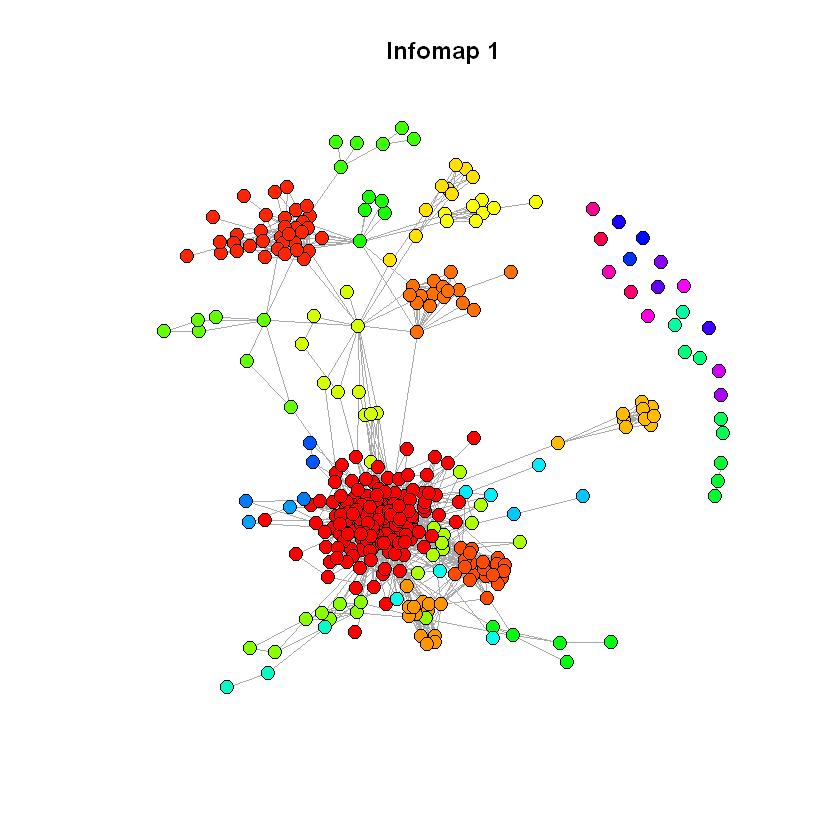

[1] "EdgeBetweenness for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  9 137 138 360 171   3  64  38   2  12   7   1   1  13   4   3  10   6   3  14 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   5   4   1   1   1   1   2   1   1   1   1   2   2   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57 
  1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5213216


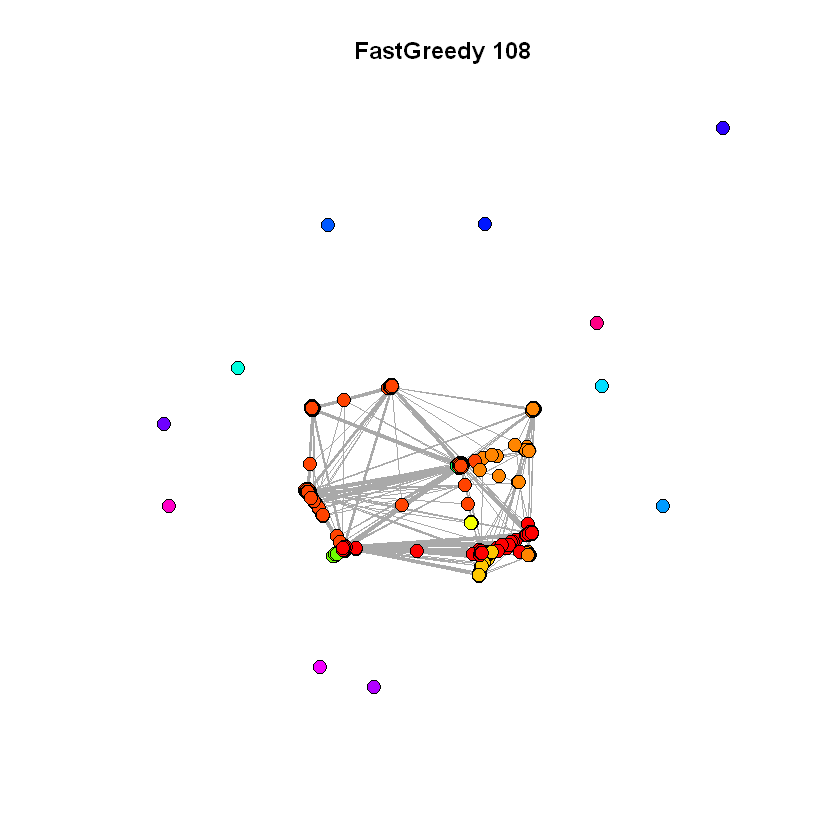

[1] "Infomap for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
325 128  96 103  71  47  38  36  36  29  19  16  12  11   9   6   7   6   5   6 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
  4   4   6   4   3   3   2   2   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5187594


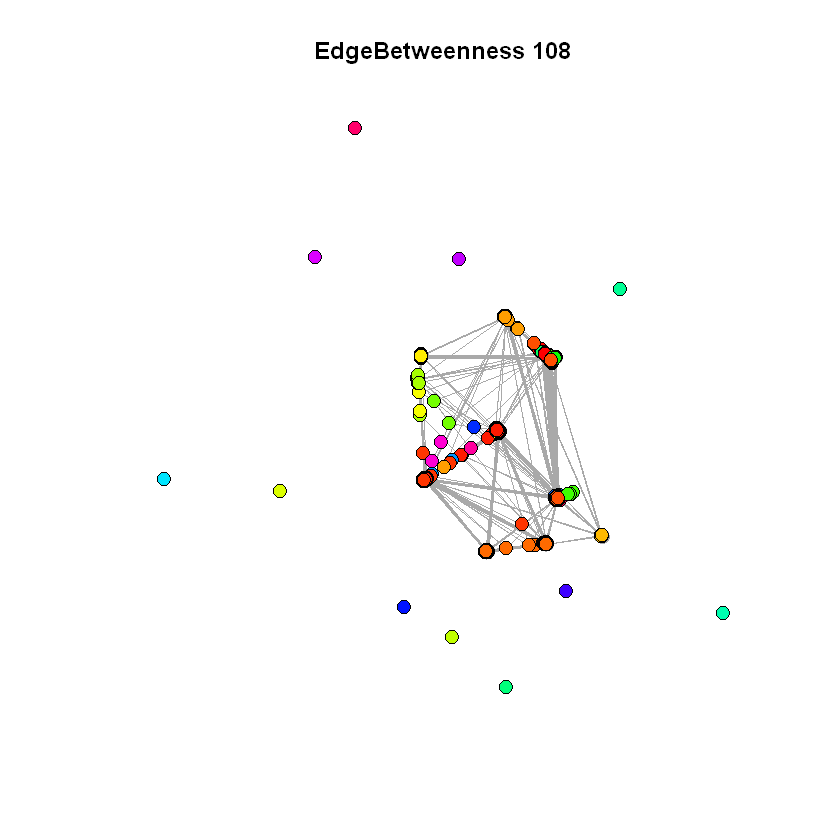

[1] "FastGreedy for Core Node:  349"
Community sizes
  1   2   3   4   5   6   7   8 
 27  80 107  10   2   1   1   1 
[1] "Modularity:"
[1] 0.2456918


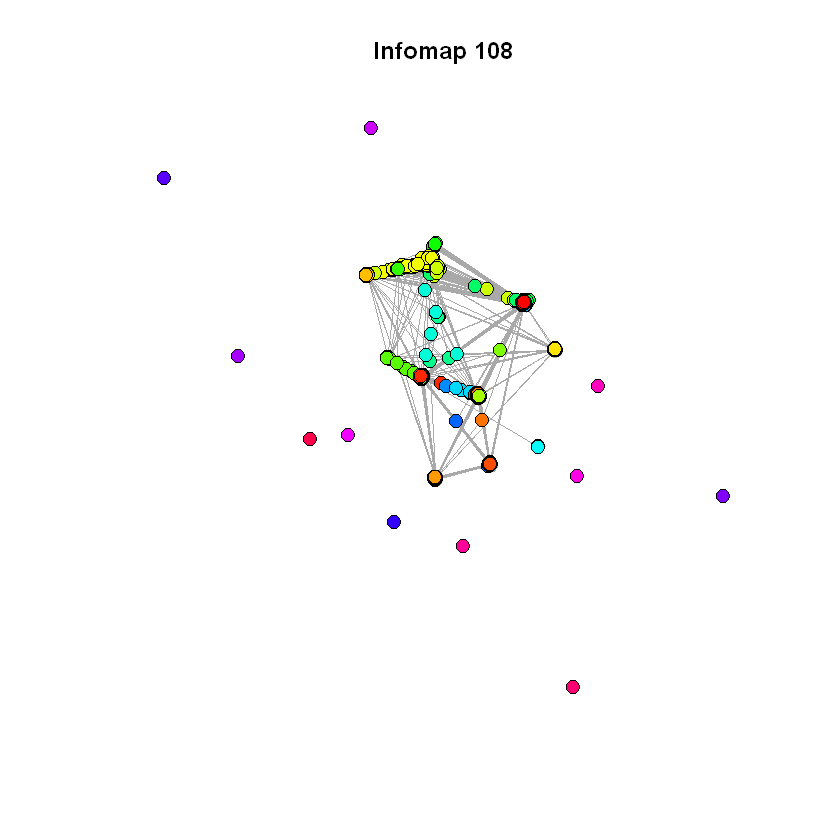

[1] "EdgeBetweenness for Core Node:  349"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1  10   2   1   1  85   1   1   2  18   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   1   3   1   2   1   1   1   1   1   7   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   3   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 
  1   1   1 
[1] "Modularity:"
[1] 0.1505663


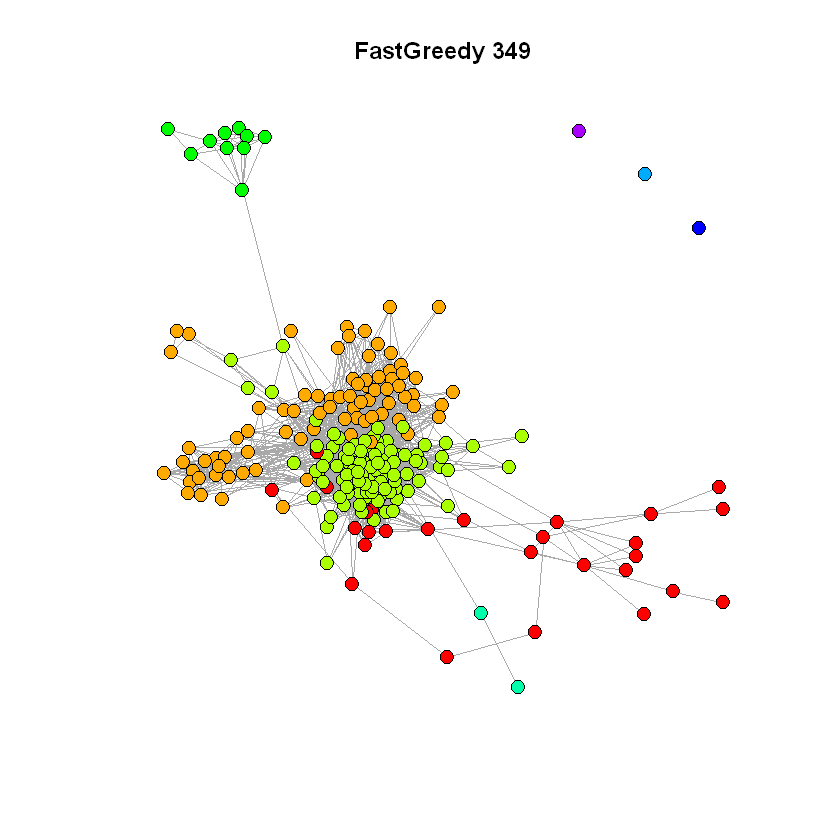

[1] "Infomap for Core Node:  349"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14 
121  29  20  17  10  11   7   4   3   2   2   1   1   1 
[1] "Modularity:"
[1] 0.2377727


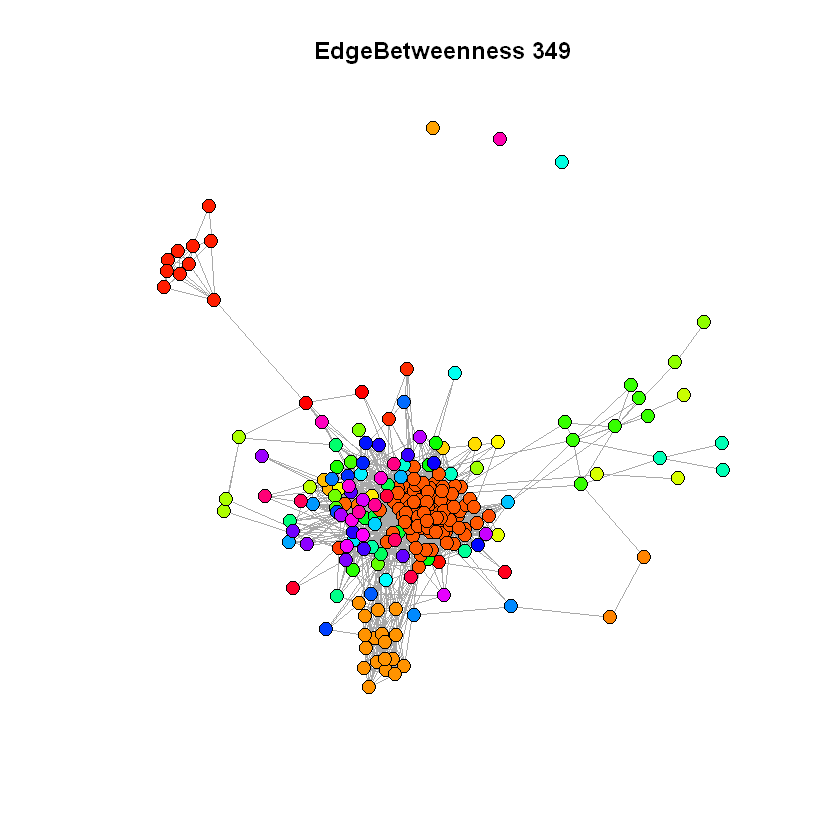

[1] "FastGreedy for Core Node:  484"
Community sizes
 1  2  3 
71 71 89 
[1] "Modularity:"
[1] 0.5342142


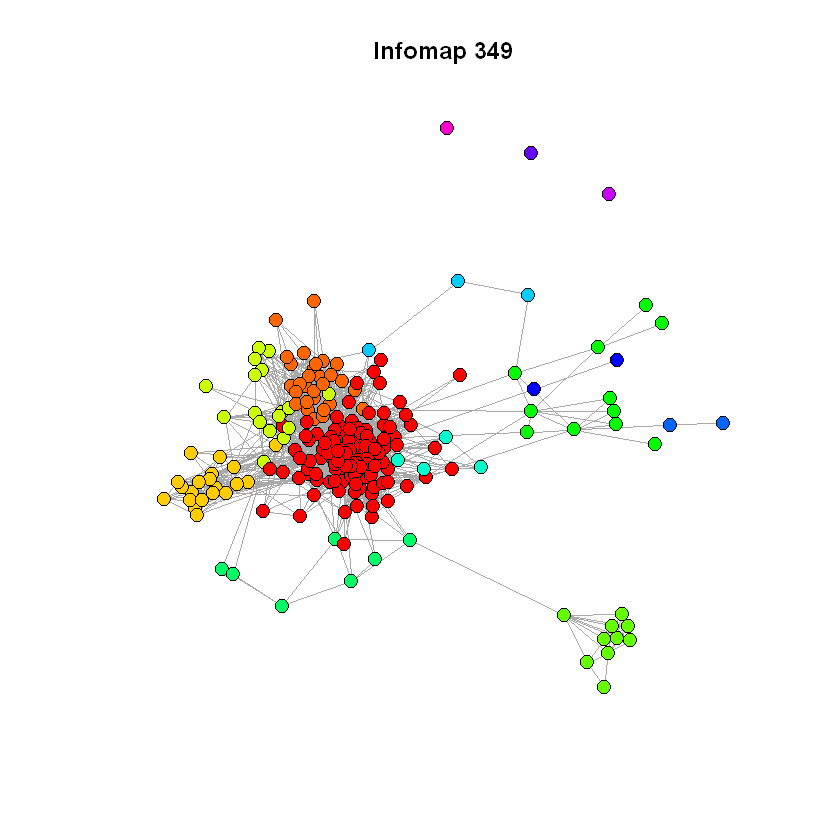

[1] "EdgeBetweenness for Core Node:  484"
Community sizes
 1  2  3  4  5  6  7  8  9 10 11 
74 79  1  1  1 69  1  1  2  1  1 
[1] "Modularity:"
[1] 0.5154413


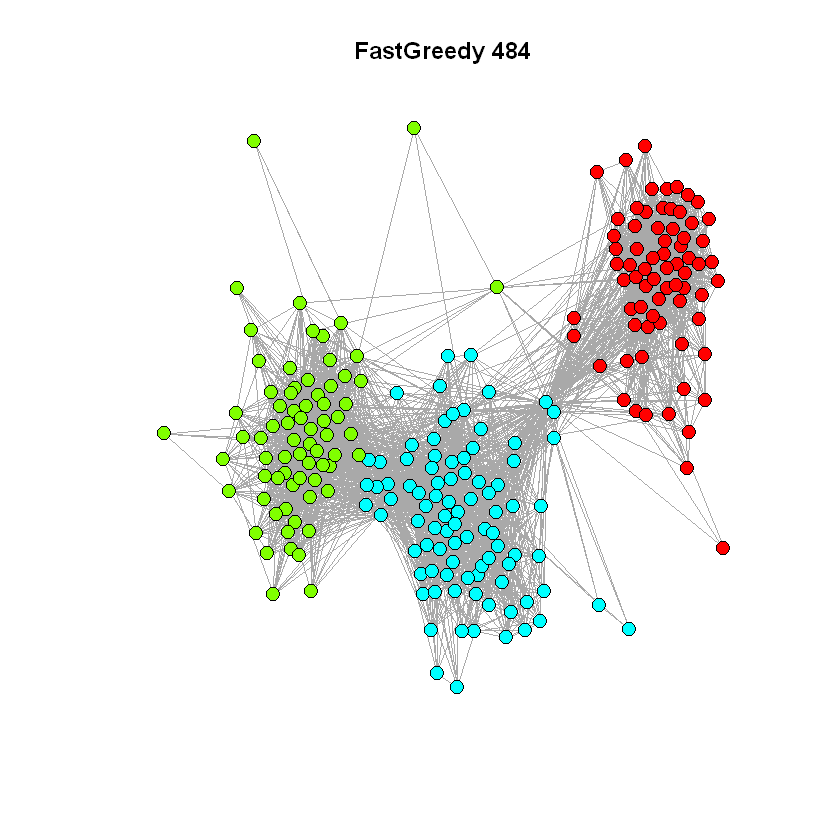

[1] "Infomap for Core Node:  484"
Community sizes
 1  2  3  4 
85 73 71  2 
[1] "Modularity:"
[1] 0.5434437


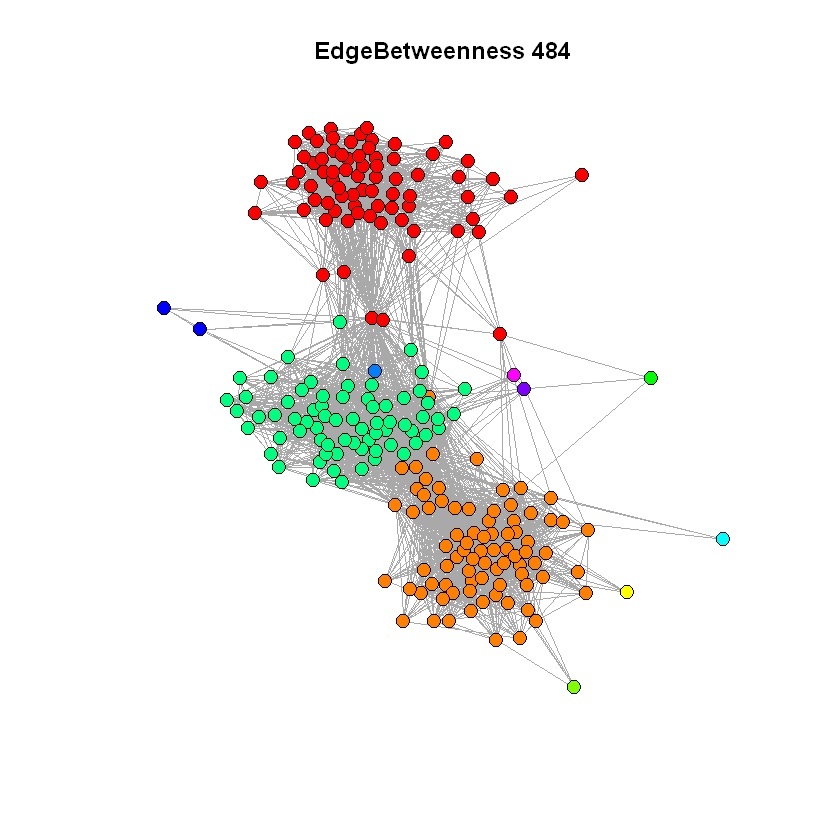

[1] "FastGreedy for Core Node:  1087"
Community sizes
  1   2 
 80 125 
[1] "Modularity:"
[1] 0.1481956


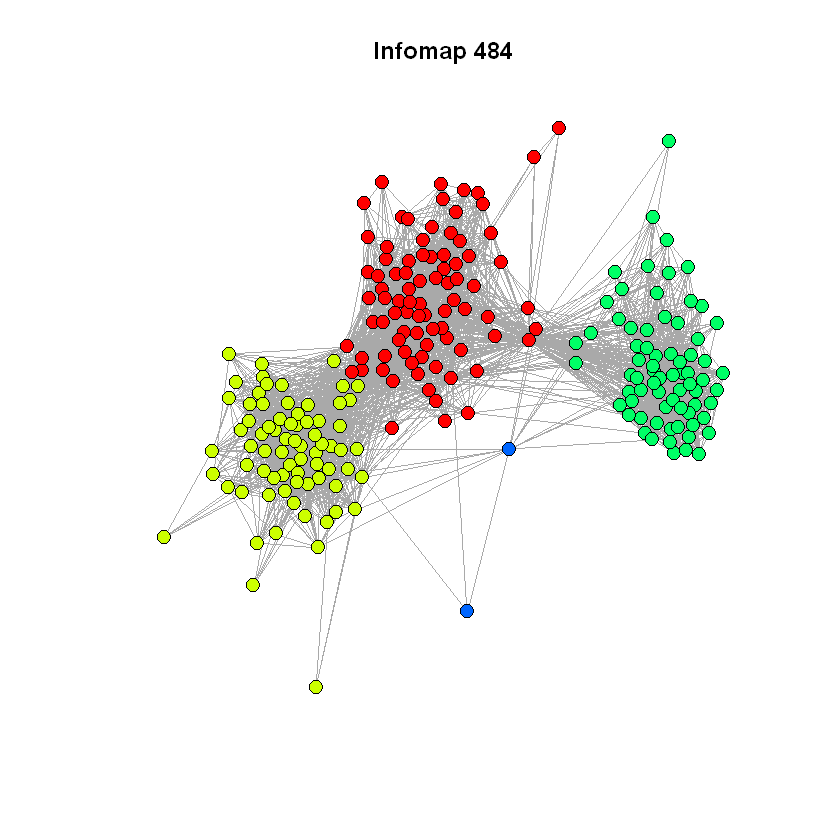

[1] "EdgeBetweenness for Core Node:  1087"
Community sizes
  1   2   3   4 
172  31   1   1 
[1] "Modularity:"
[1] 0.0324953


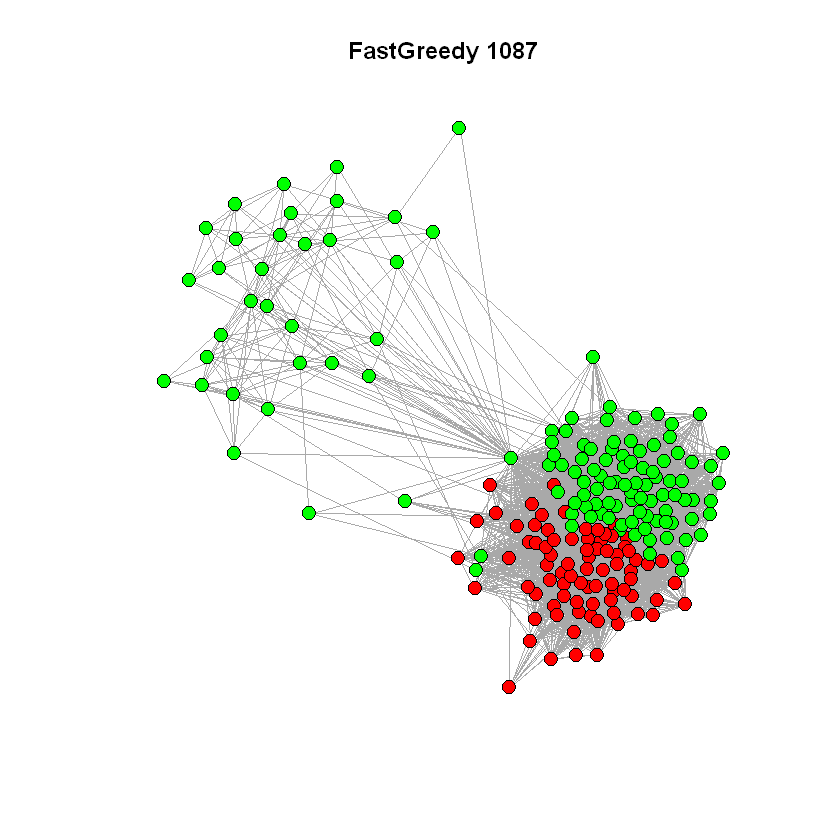

[1] "Infomap for Core Node:  1087"
Community sizes
  1   2   3   4   5 
174  12  10   7   2 
[1] "Modularity:"
[1] 0.02737159


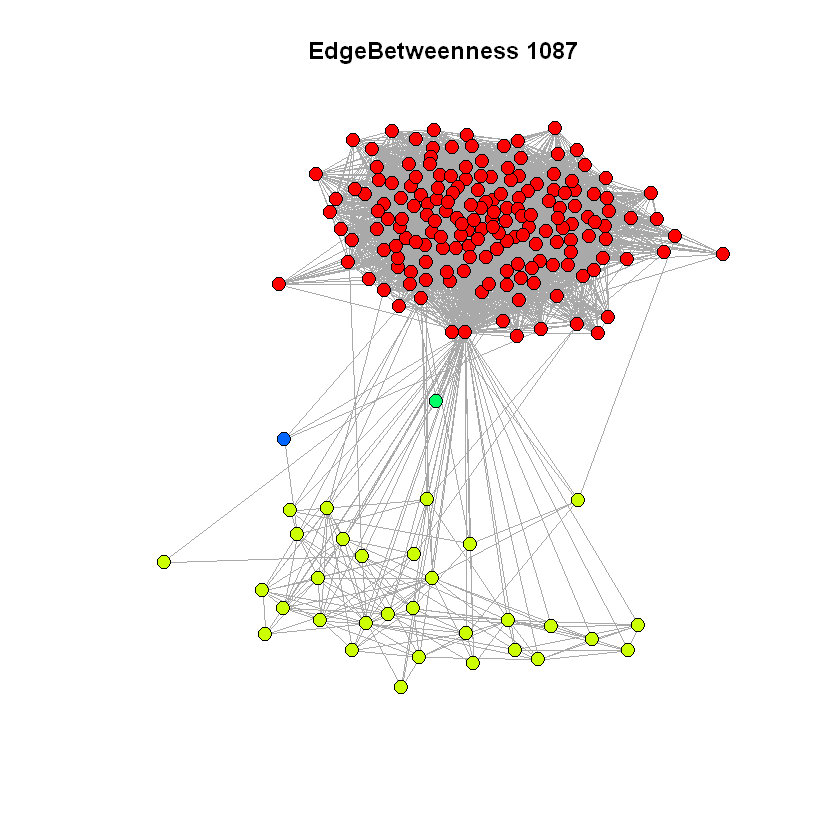

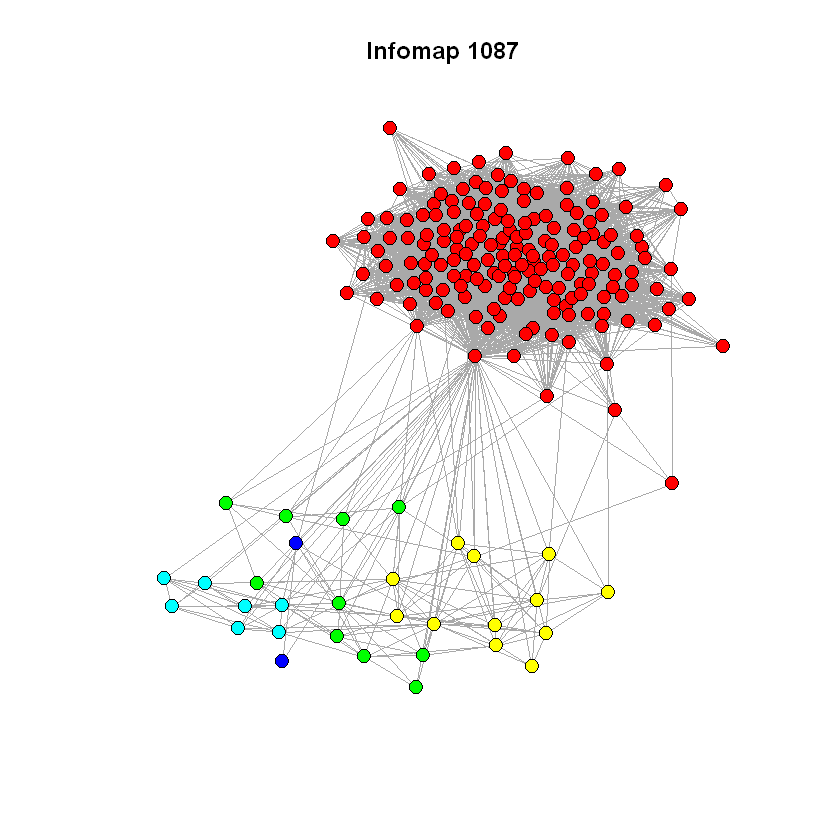

In [38]:
#10
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(108)
for(coreNode in coreNodeList){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    #vertices = c(vertices, coreNode)
    length(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    layout = layout.fruchterman.reingold(personalizedGraph)
    
    communityGraphs(personalizedGraph, "FastGreedy", coreNode)
    communityGraphs(personalizedGraph, "EdgeBetweenness", coreNode)
    communityGraphs(personalizedGraph, "Infomap", coreNode)
}

[1] "FastGreedy for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 52  39 121  18  52  24  10   8   3   2   2   2   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26 
  1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4418533
[1] "EdgeBetweenness for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 27  39 140  10   8   9   1   1   1   1  22   1   2   5  13   1   1   2   6   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   5   7   7   1   2   3   1   2   1   1   1   1   1   2   1   1   1   1   2 
 41  42  43  44  45  46  47  48  49  50 
  2   1   2   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4161461


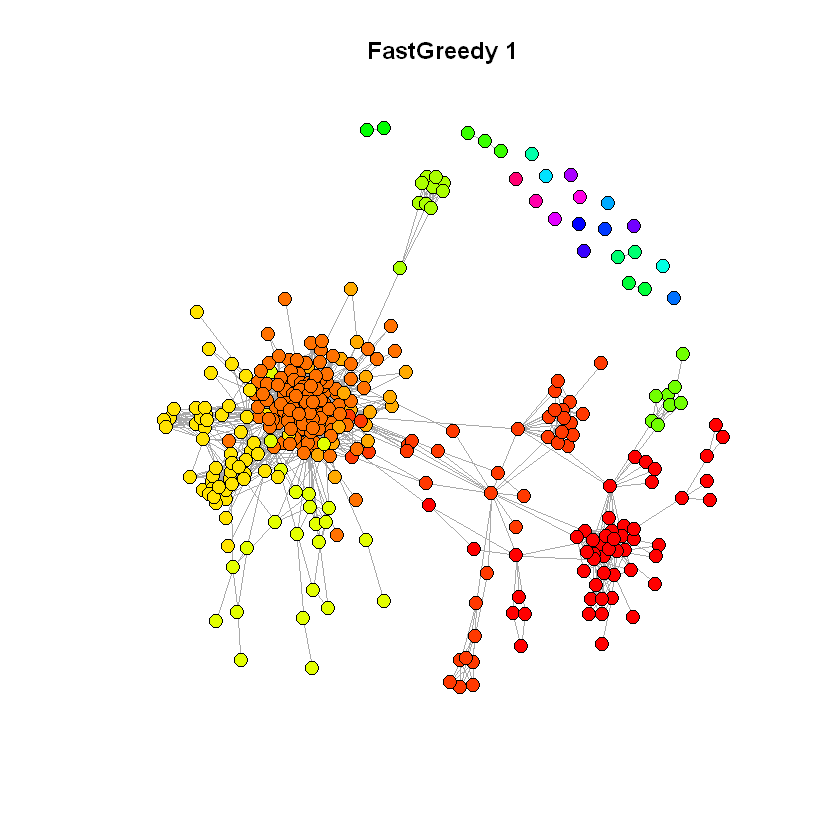

[1] "Infomap for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
143  34  21  16  13  10   9   8  11  10   9   7   6   5   5   3   2   2   2   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   3   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.4180077


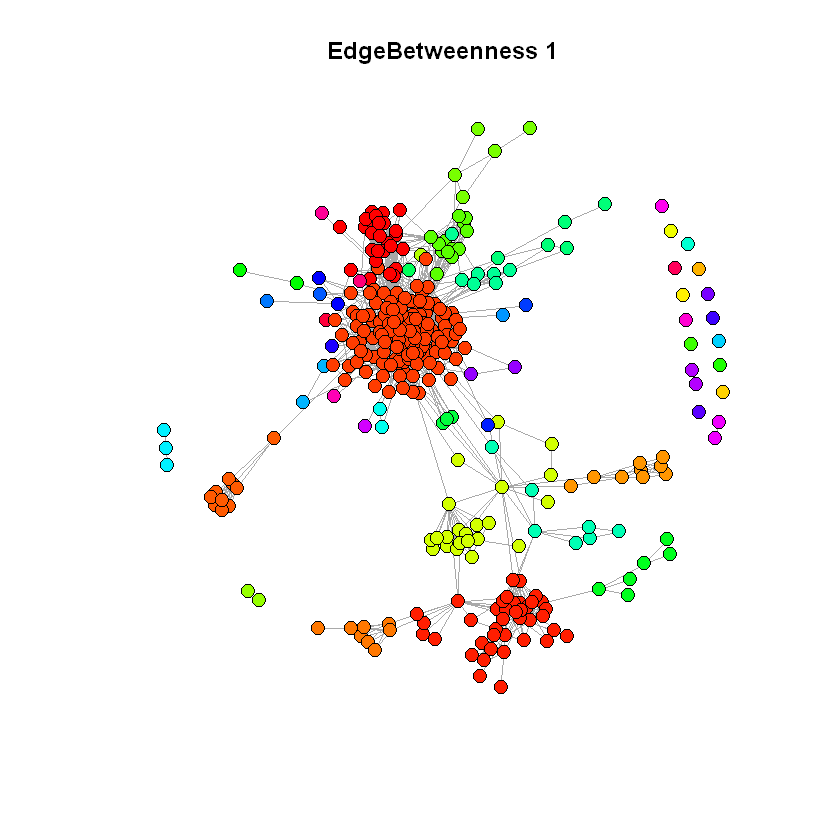

[1] "FastGreedy for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
458 465  70  19   4   3   6   2   2   3   2   1   1   1   1   1   1   1   1   1 
 21  22 
  1   1 
[1] "Modularity:"
[1] 0.4581271


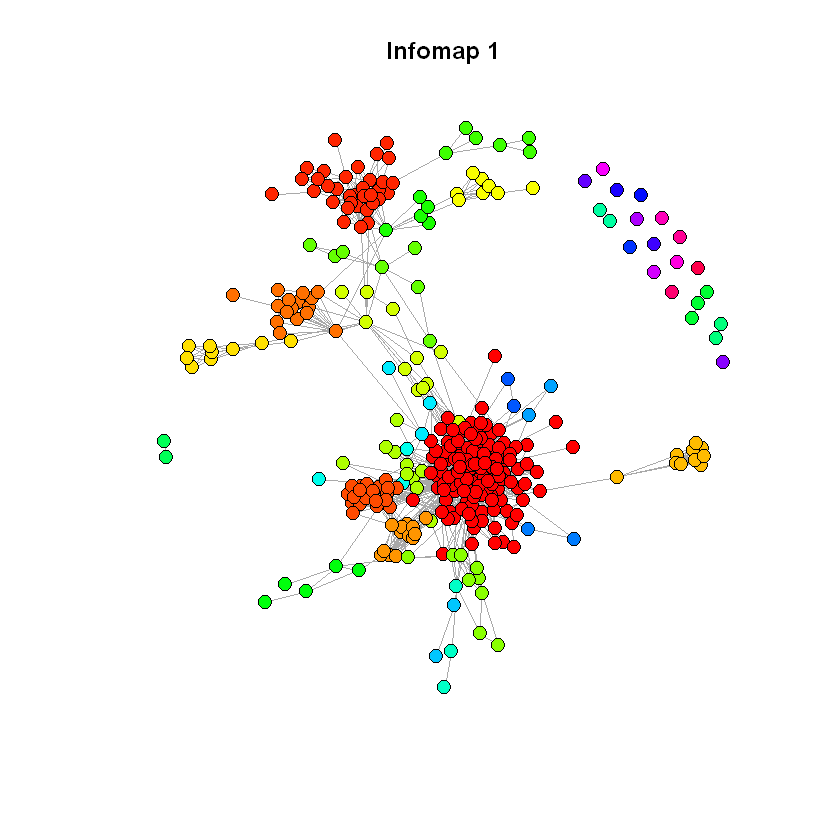

[1] "EdgeBetweenness for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  9 137 138 360 171   3  64  38   2  12   7   1   1  13   4   3  10   6   3  14 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   5   4   1   1   1   1   2   1   1   1   1   2   2   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57 
  1   1   1   1   1   1   1   1   1   1   2   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5213216


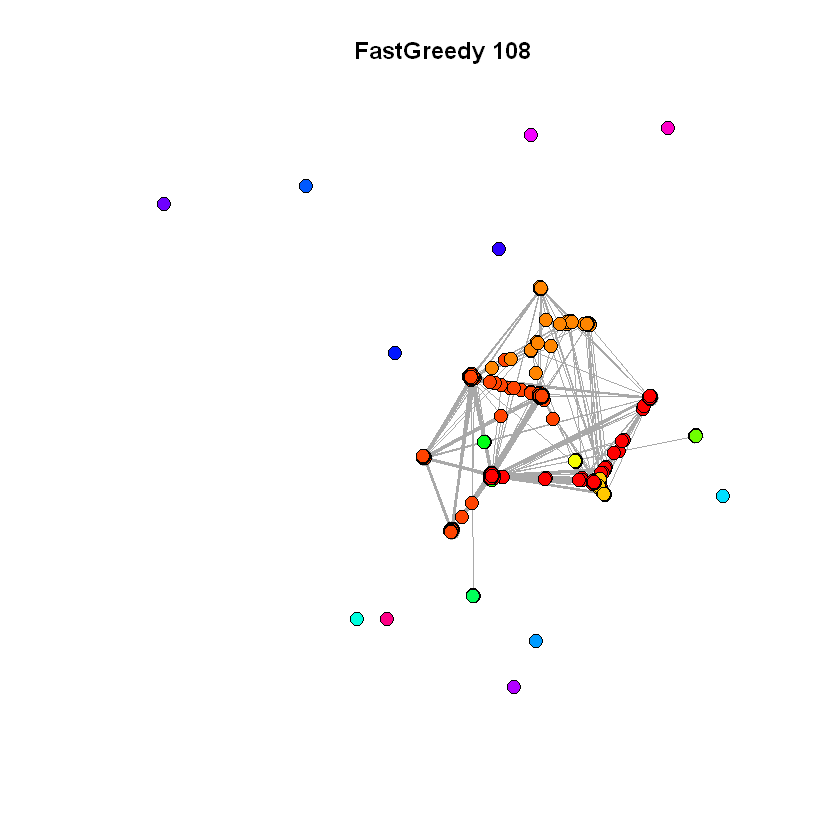

[1] "Infomap for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
325 128  95 103  71  71  48  38  29  18  16  12  11  10   6   6   6   5   6   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
  4   6   4   3   3   2   2   2   1   1   1   1   1   1   1   1   1   1   1 
[1] "Modularity:"
[1] 0.5207602


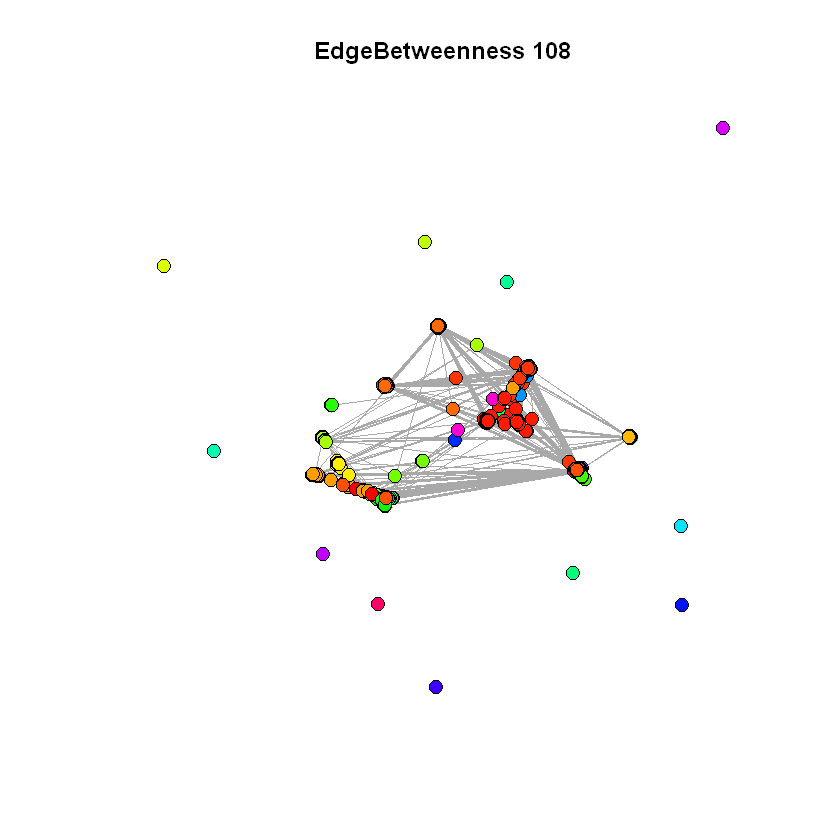

[1] "FastGreedy for Core Node:  349"
Community sizes
  1   2   3   4   5   6   7   8 
 27  80 107  10   2   1   1   1 
[1] "Modularity:"
[1] 0.2456918


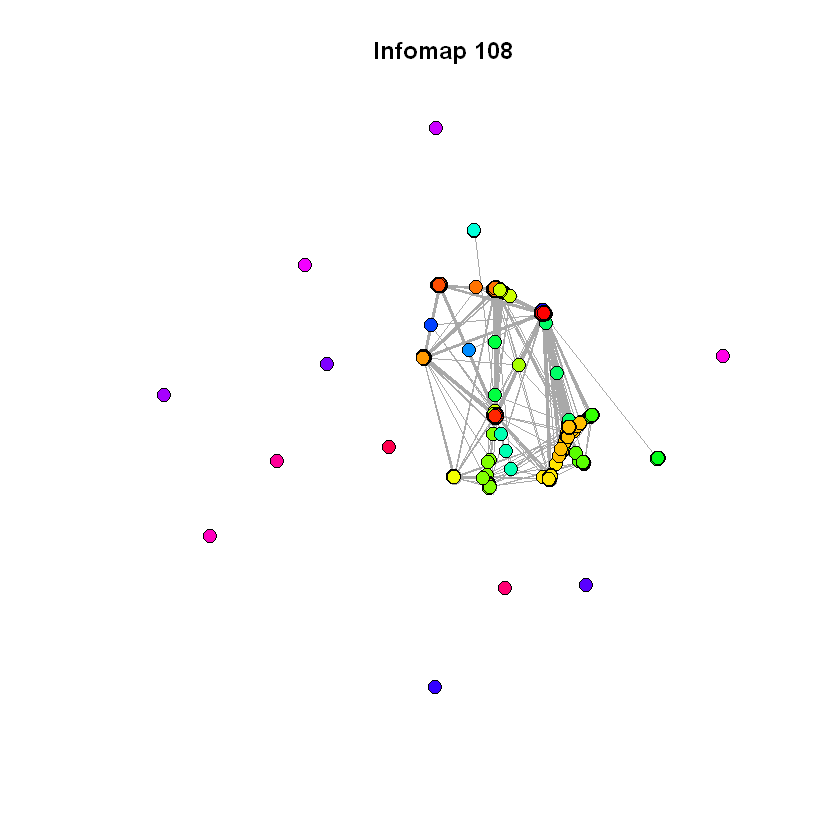

[1] "EdgeBetweenness for Core Node:  349"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1  10   2   1   1  85   1   1   2  18   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   1   3   1   2   1   1   1   1   1   7   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   3   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
101 102 103 
  1   1   1 
[1] "Modularity:"
[1] 0.1505663


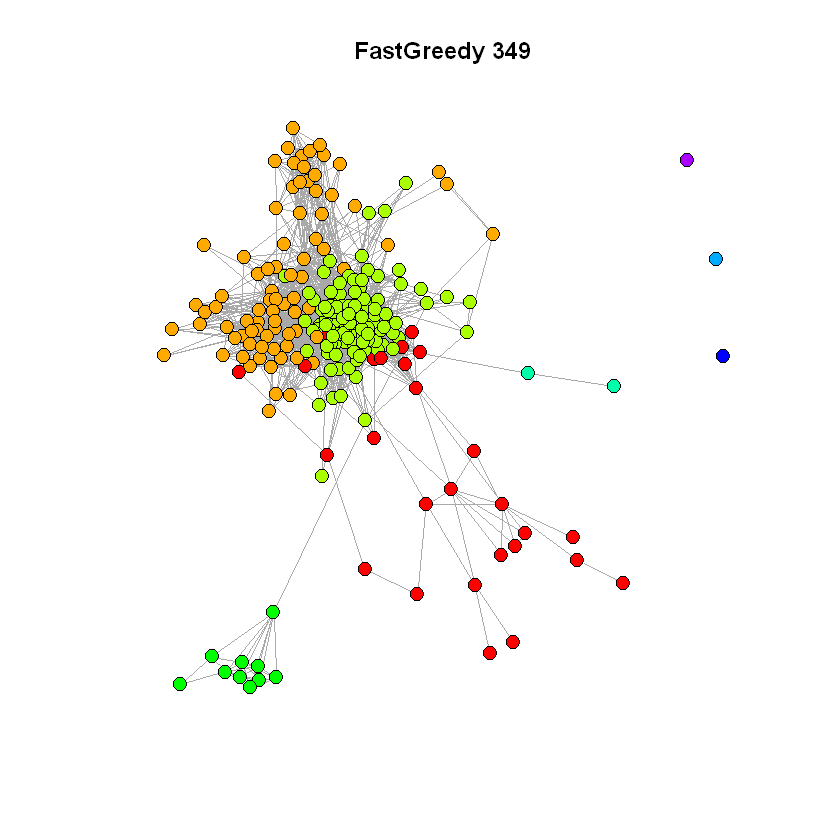

[1] "Infomap for Core Node:  349"
Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14 
122  26  20  19  10  11   7   4   3   2   2   1   1   1 
[1] "Modularity:"
[1] 0.2337732


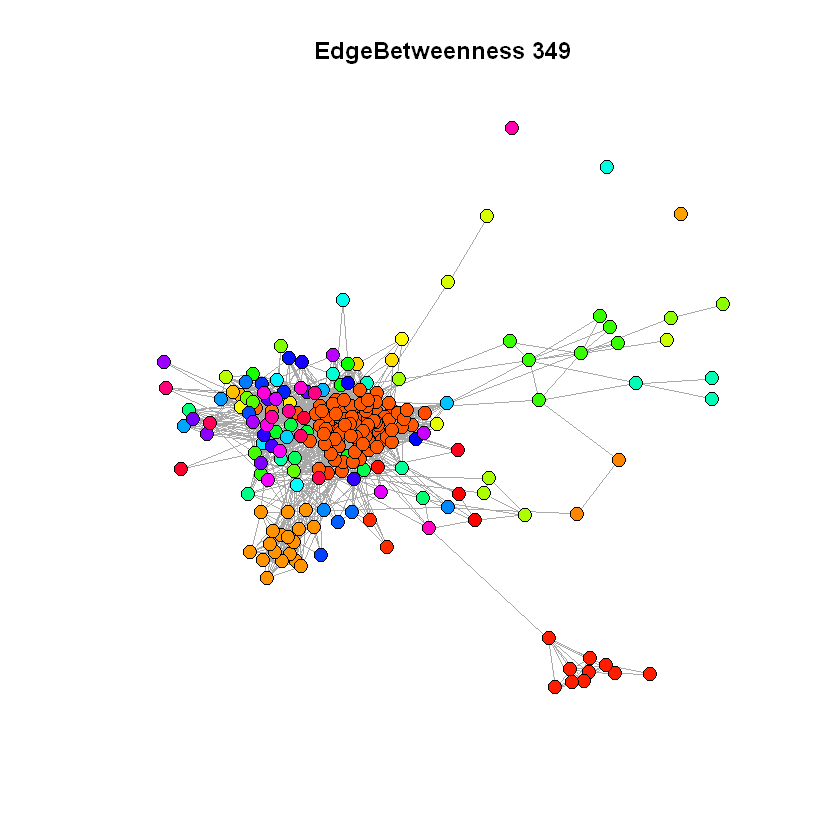

[1] "FastGreedy for Core Node:  484"
Community sizes
 1  2  3 
71 71 89 
[1] "Modularity:"
[1] 0.5342142


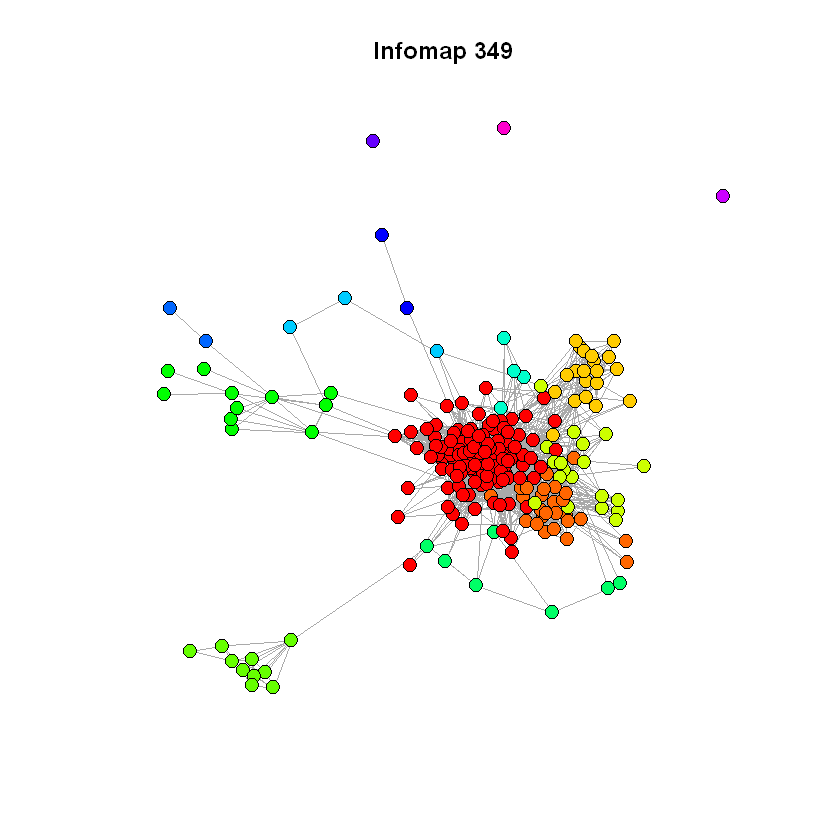

[1] "EdgeBetweenness for Core Node:  484"
Community sizes
 1  2  3  4  5  6  7  8  9 10 11 
74 79  1  1  1 69  1  1  2  1  1 
[1] "Modularity:"
[1] 0.5154413


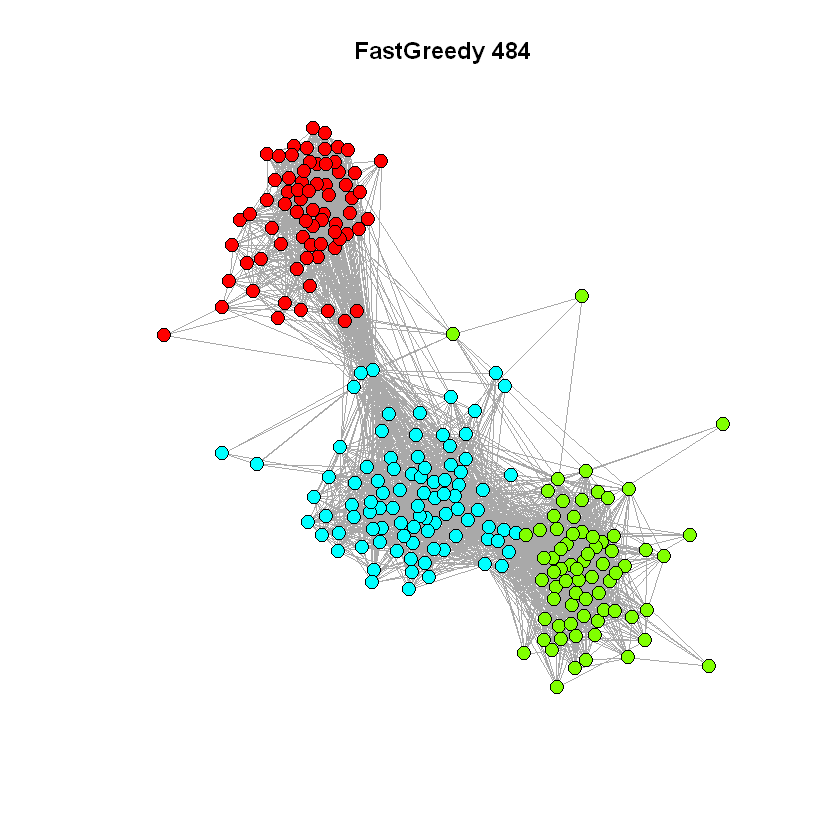

[1] "Infomap for Core Node:  484"
Community sizes
 1  2  3  4 
85 73 71  2 
[1] "Modularity:"
[1] 0.5434437


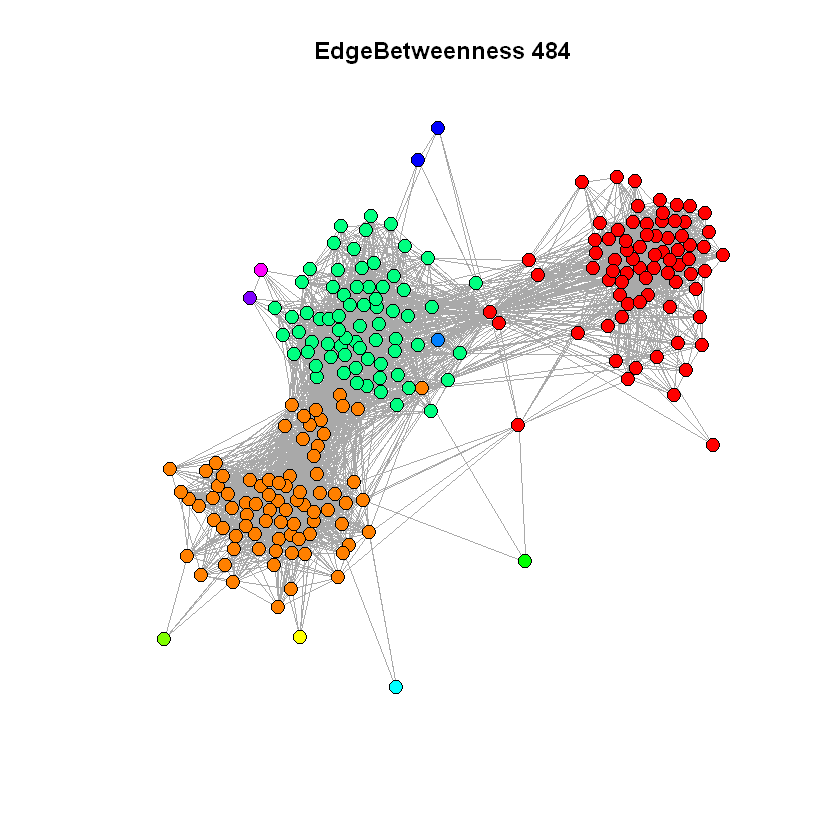

[1] "FastGreedy for Core Node:  1087"
Community sizes
  1   2 
 80 125 
[1] "Modularity:"
[1] 0.1481956


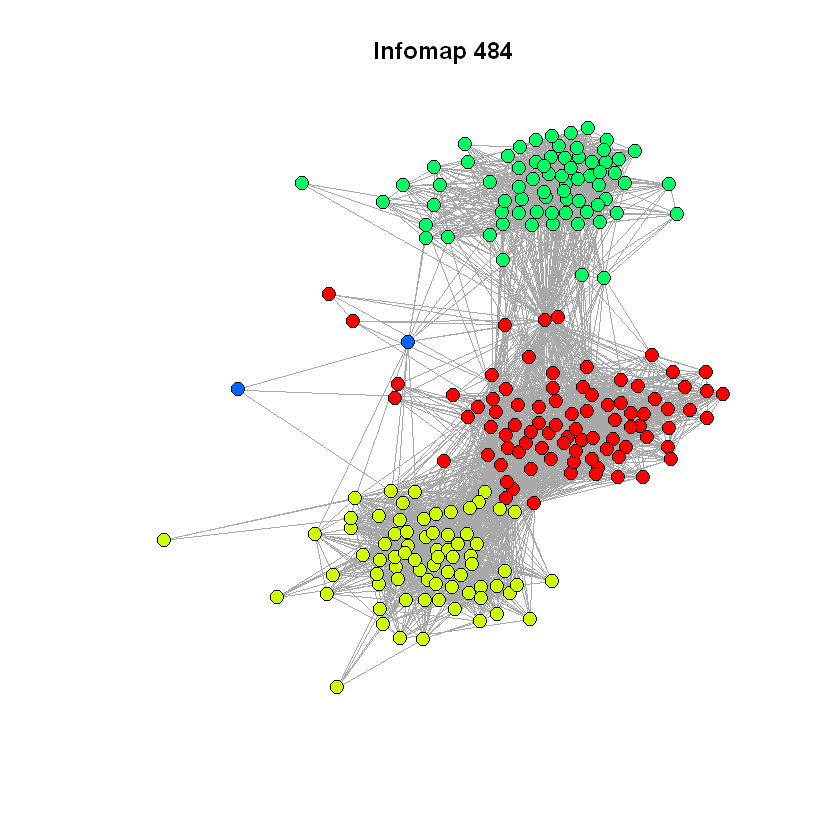

[1] "EdgeBetweenness for Core Node:  1087"
Community sizes
  1   2   3   4 
172  31   1   1 
[1] "Modularity:"
[1] 0.0324953


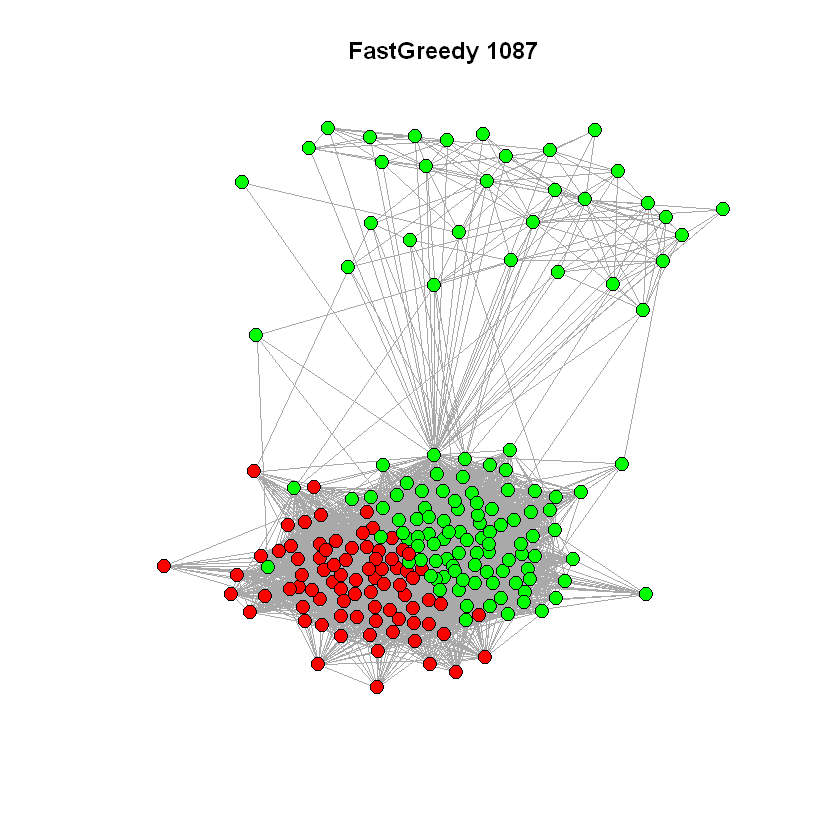

[1] "Infomap for Core Node:  1087"
Community sizes
  1   2   3   4   5 
174  12  10   7   2 
[1] "Modularity:"
[1] 0.02737159


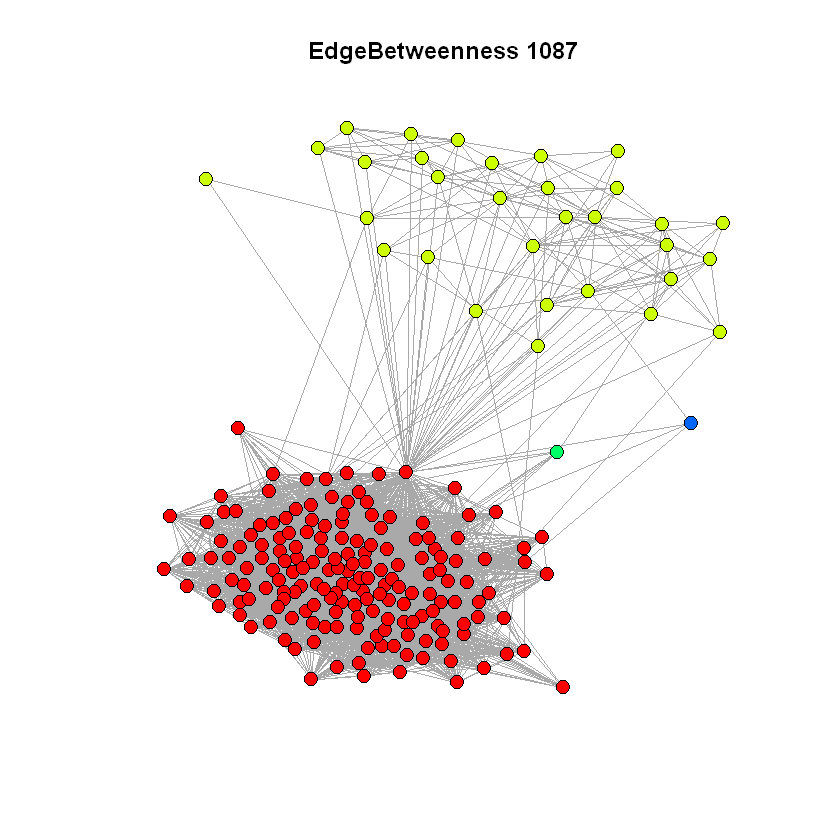

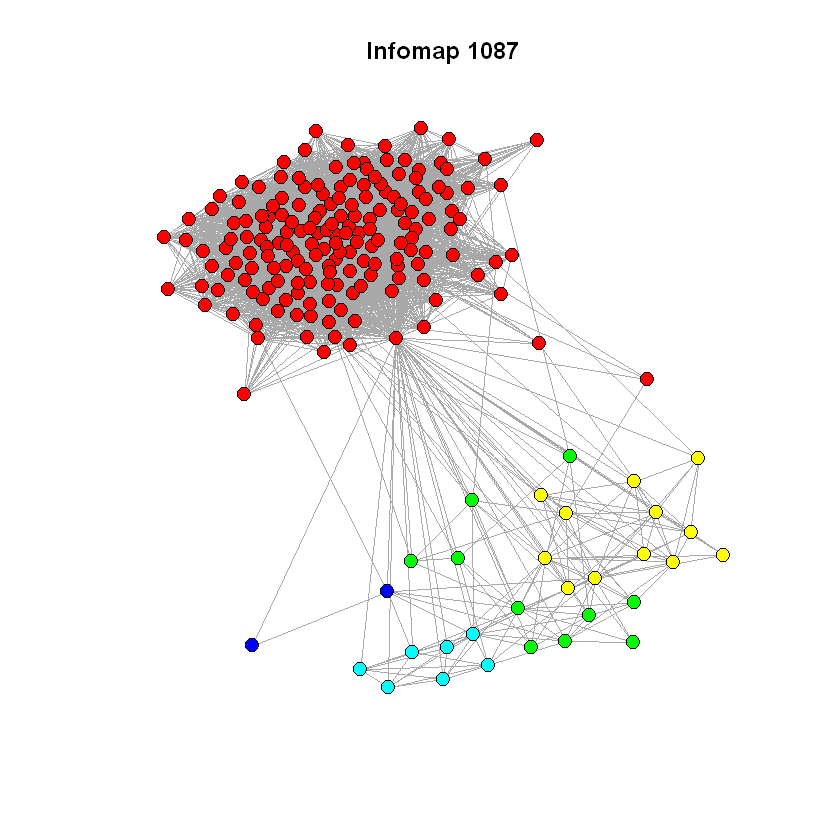

In [39]:
#alternate 10

coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(108)
for(coreNode in coreNodeList){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    vertices = c(vertices, coreNode)
    length(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    
    coreNodeIndex = -1
    for(i in 1:vcount(personalizedGraph)){
        if(V(personalizedGraph)[i]$vid == coreNode){
            coreNodeIndex = i
            break
        }
    }
    
    personalizedGraph = delete_vertices(personalizedGraph, coreNodeIndex)
    layout = layout.fruchterman.reingold(personalizedGraph)
    
    communityGraphs(personalizedGraph, "FastGreedy", coreNode)
    communityGraphs(personalizedGraph, "EdgeBetweenness", coreNode)
    communityGraphs(personalizedGraph, "Infomap", coreNode)
}

In [72]:
#11
#theoretical

In [1]:
#12, 13, 14
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(1087)
for(coreNode in coreNodeList1){
    vertices = fbAdList[[coreNode]]
    vertices = as.list(vertices)
    #vertices = c(vertices, coreNode)
    #length(vertices)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    personalizedAdList = as_adj_list(personalizedGraph)
    
    embeddedness = c()
    dispersion = c()
    for(node in 1:vcount(personalizedGraph)){
        embeddedness = c(embeddedness, length(personalizedAdList[[node]]))
        
        newGraph = delete_vertices(personalizedGraph, node)
        distMatrix = shortest.paths(newGraph, mode = 'all') 
        print(distMatrix)
        
        distance = 0
        for(i in 1:vcount(newGraph)){
            for(j in i:vcount(newGraph)){
                distance = distance + distMatrix[i, j]
            }
        }
        
        dispersion = c(dispersion, distance)
        
    }
    barplot(embeddedness)
    hist(embeddedness, breaks = max(embeddedness))
    barplot(dispersion)
    hist(dispersion, breaks = max(dispersion))
}

ERROR: Error in eval(expr, envir, enclos): object 'fbAdList' not found


In [47]:
g<-make_full_graph(5)
V(g)$vid = seq(1,vcount(g),1)
print(V(g)$vid)
subgraph = induced.subgraph(g, c(1,3,4))
print(V(subgraph))

[1] 1 2 3 4 5
+ 3/3 vertices, from 0a4df34:
[1] 1 2 3


In [10]:
findIndex = function(graph, nodeIndex){
    index = -1
    for(i in 1:vcount(graph)){
        if(V(graph)[i]$vid == nodeIndex){
            index = i
            break
        }
    }
    
    return(index)
}

[1] "Max Embeddedness: 77"
[1] "Max Dispersion: 4882"
[1] "Max Ratio: 63.4025974025974"


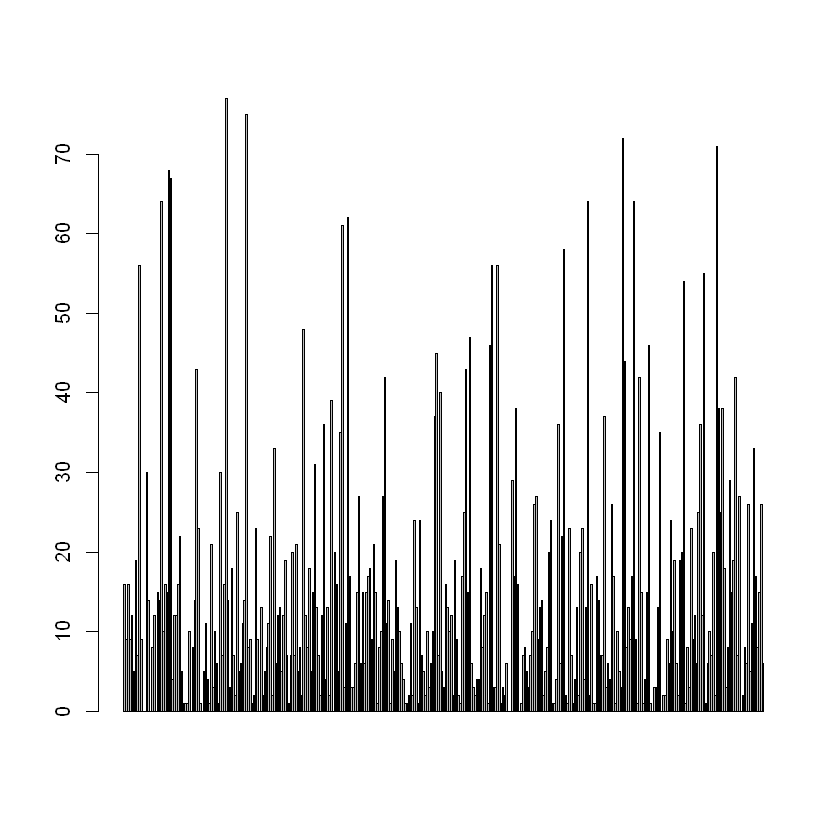

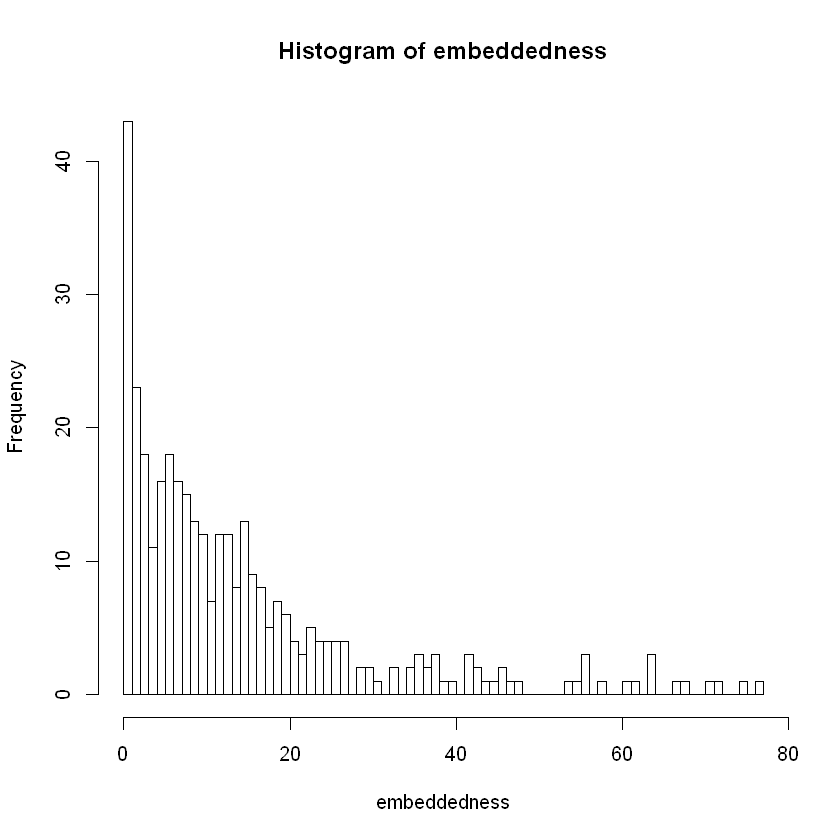

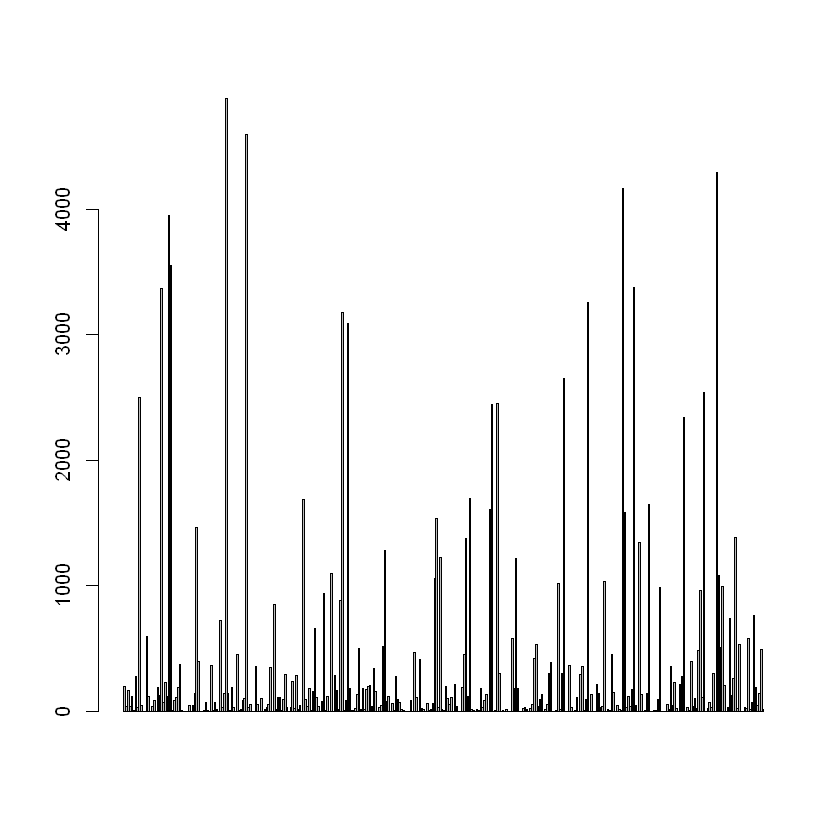

[1] "Fast Greedy for Core Node:  1"
Community sizes
  1   2   3   4   5   6   7   8 
114 112  22  39  31  12  10   8 
[1] "Modularity:"
[1] 0.4131014


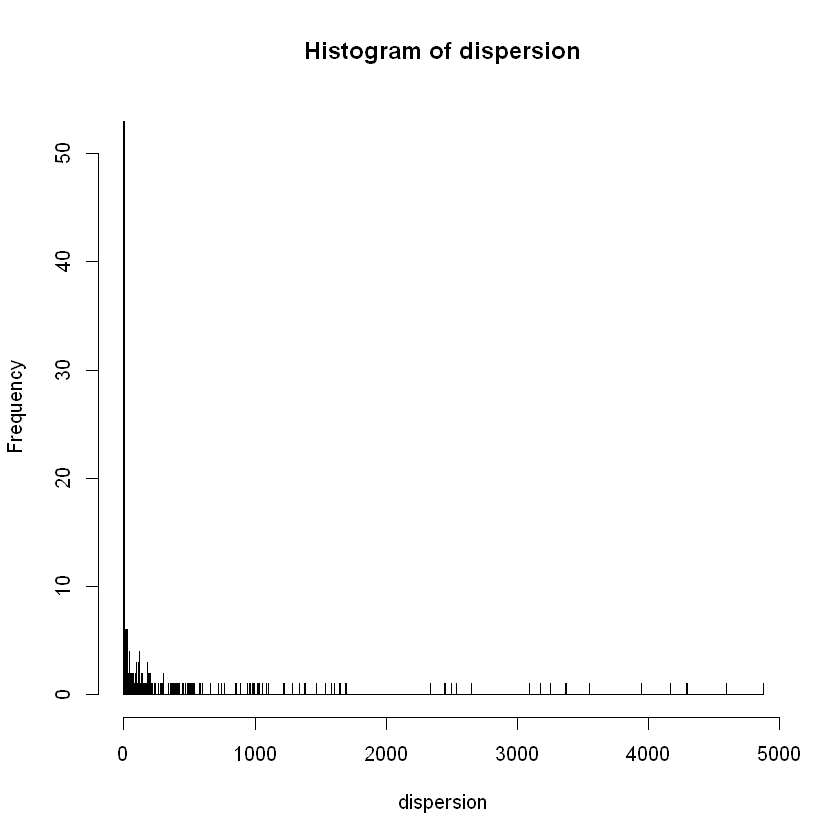

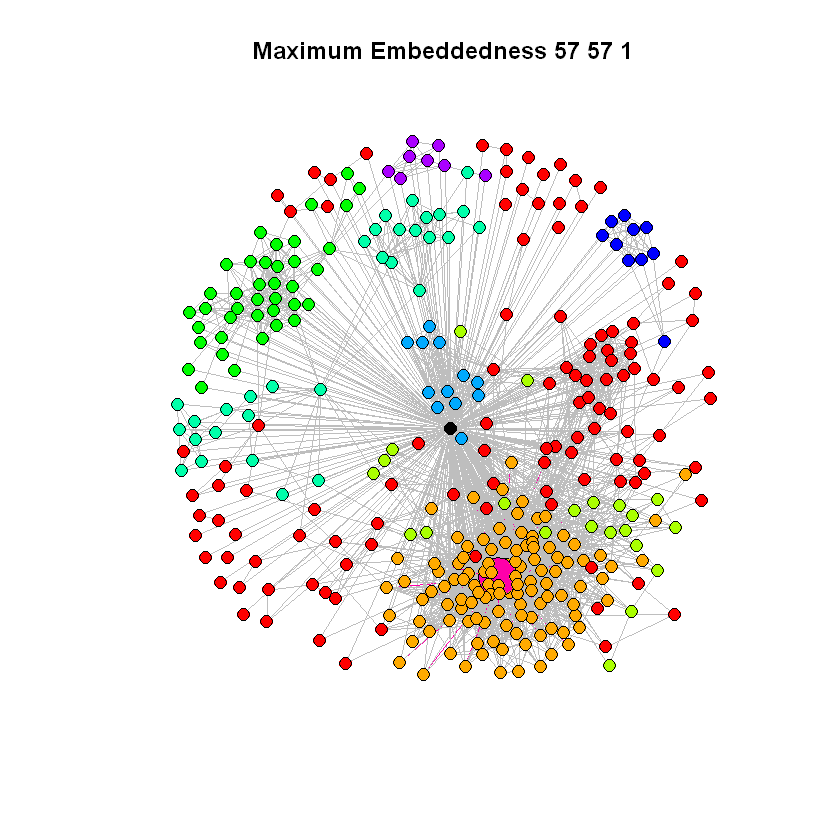

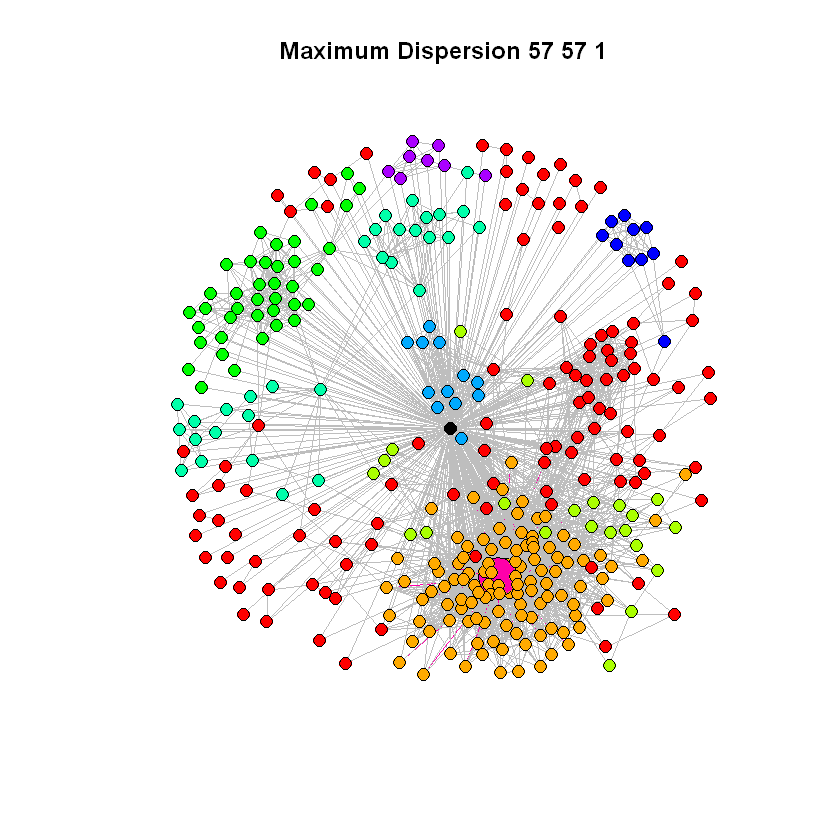

[1] "Max Embeddedness: 253"
[1] "Max Dispersion: 51167"
[1] "Max Ratio: 202.241106719368"


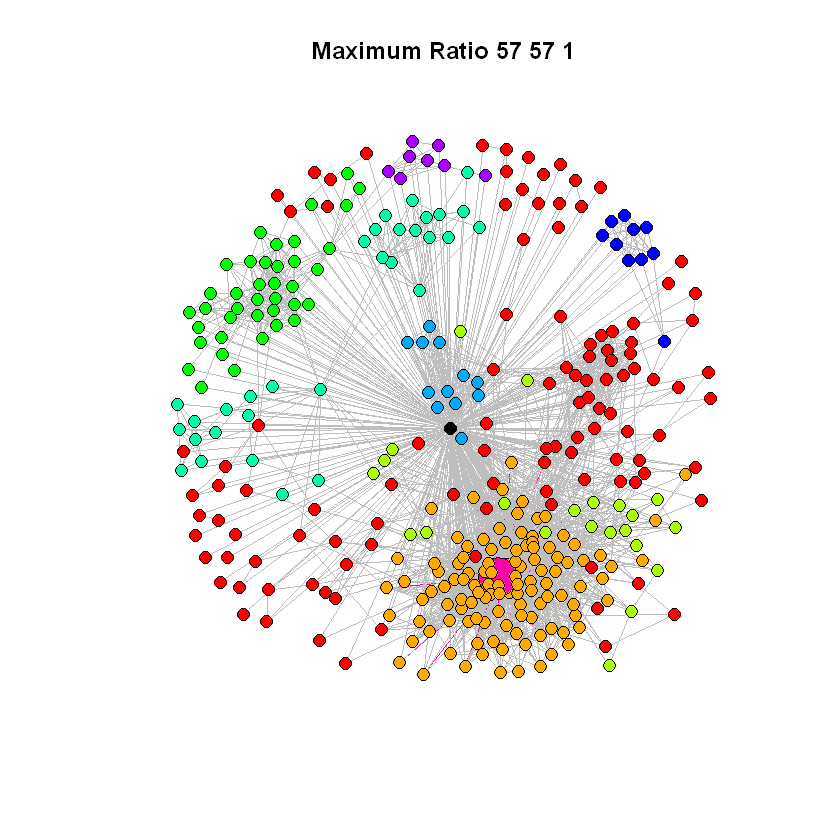

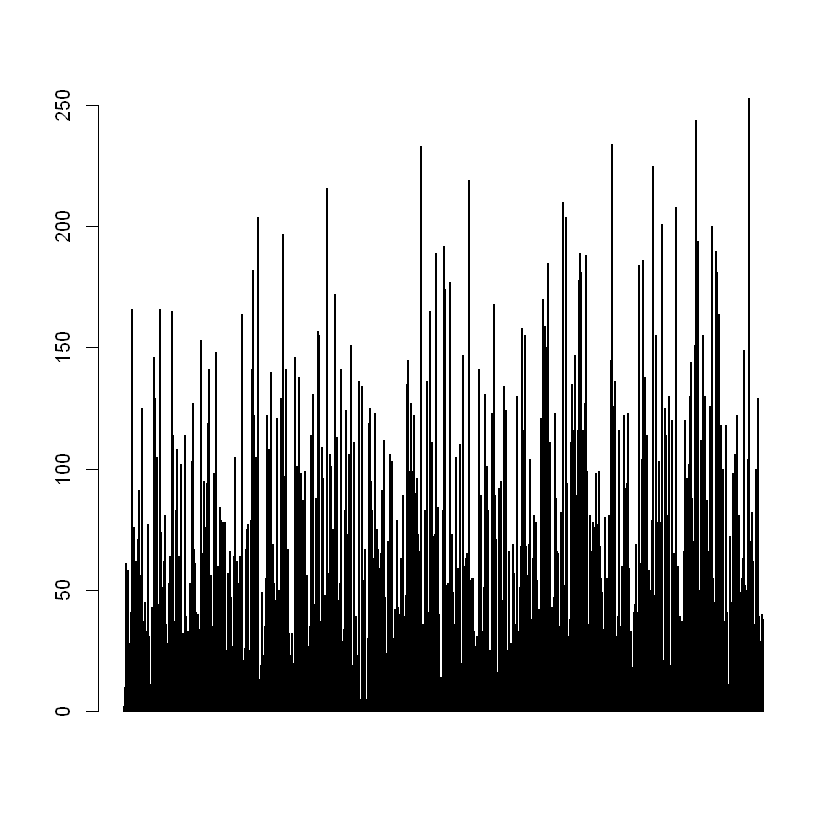

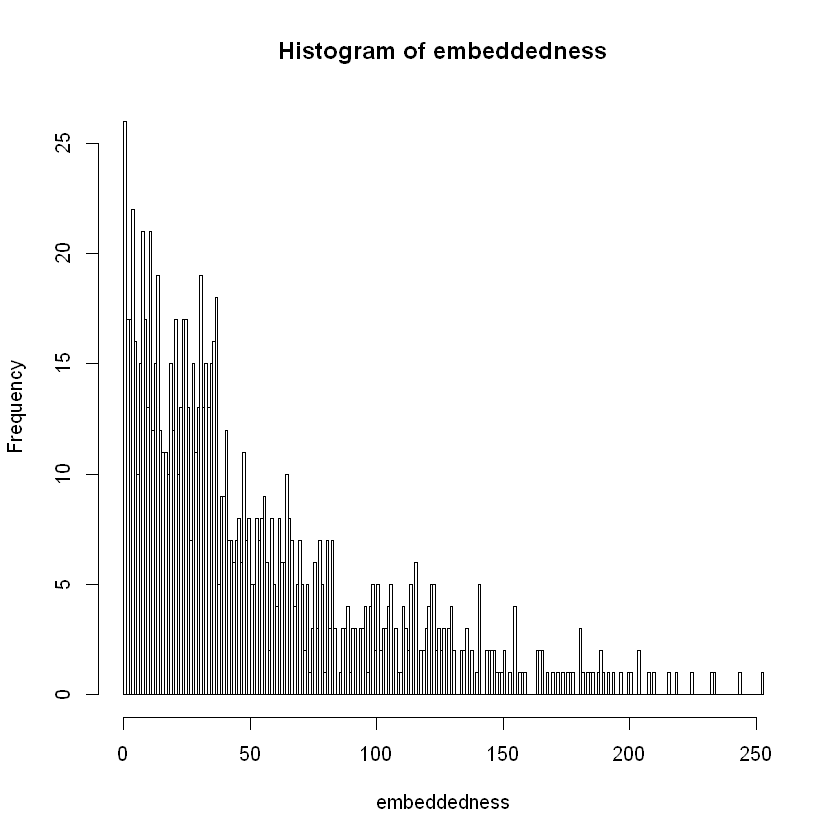

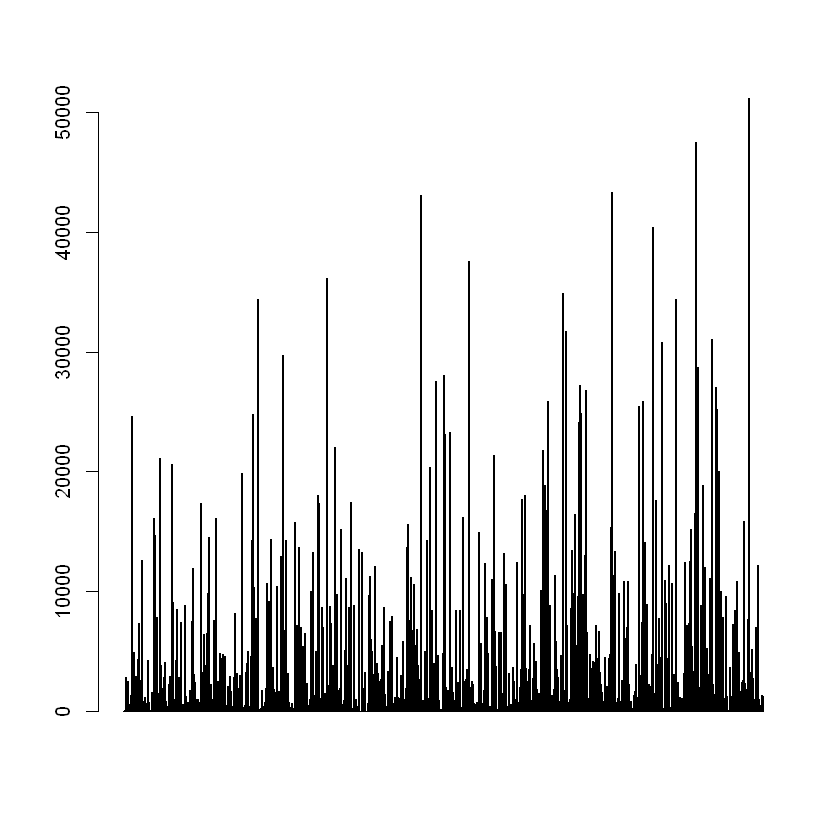

[1] "Fast Greedy for Core Node:  108"
Community sizes
  1   2   3   4   5   6   7   8   9 
464 484  70   9   5   3   6   2   3 
[1] "Modularity:"
[1] 0.4359294


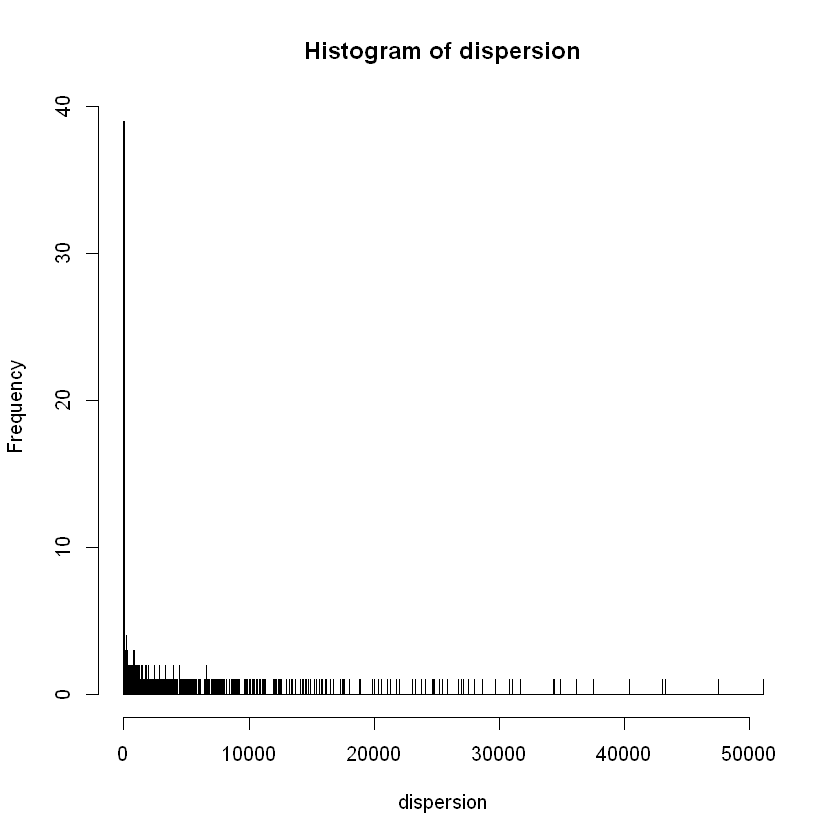

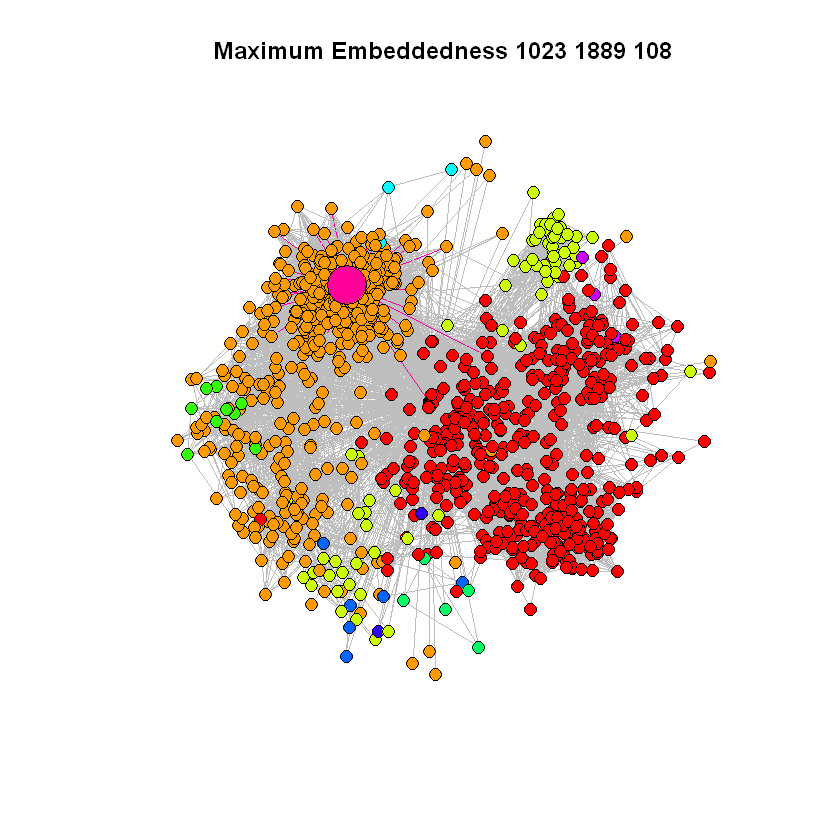

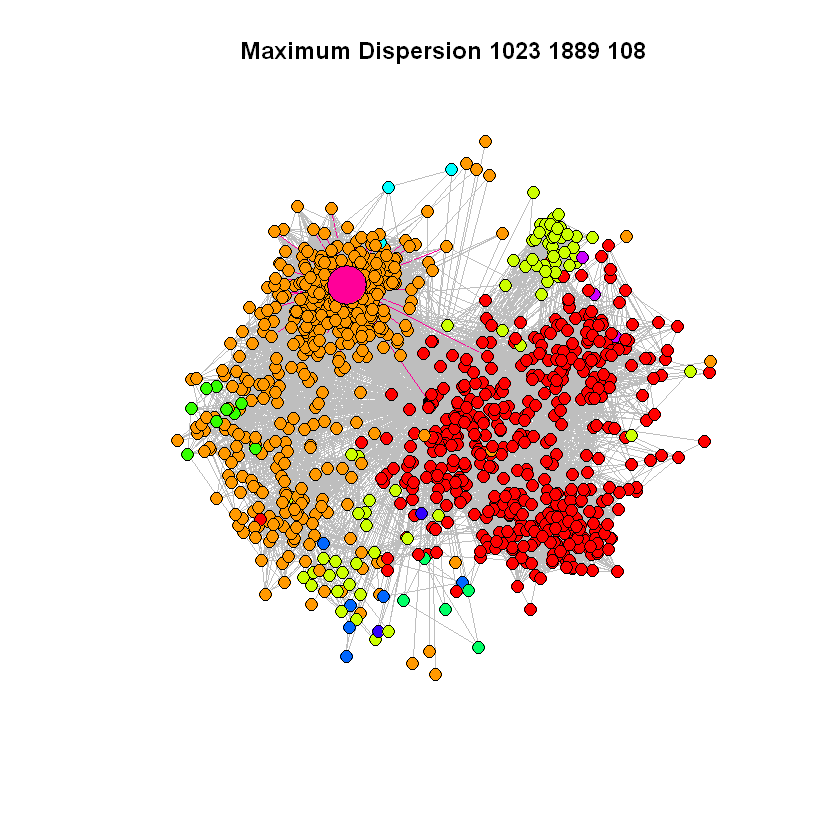

[1] "Max Embeddedness: 100"
[1] "Max Dispersion: 8174"
[1] "Max Ratio: 81.74"


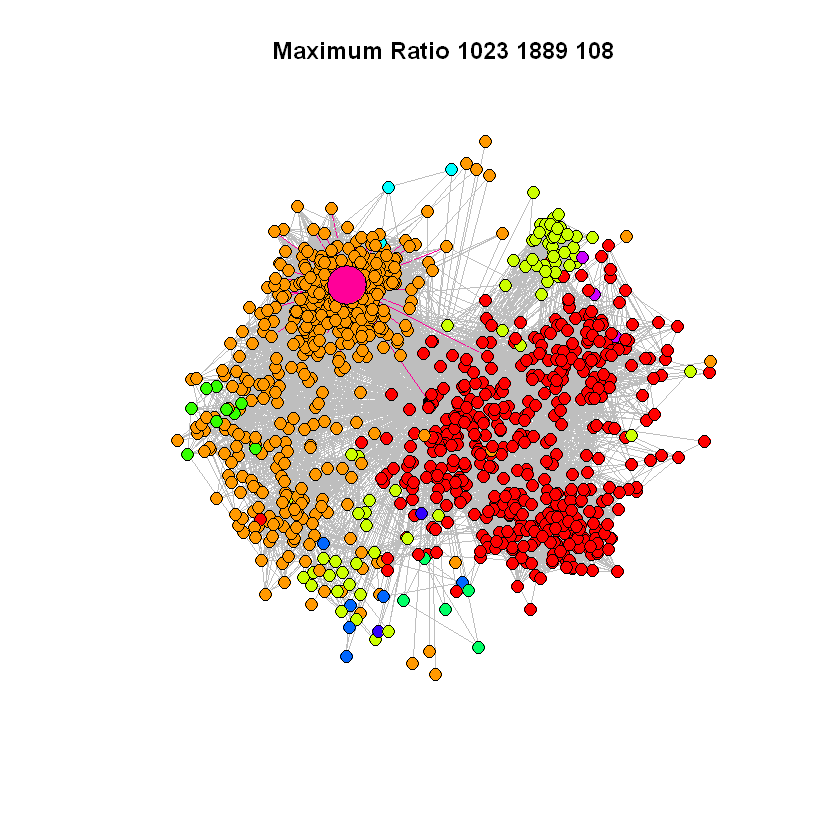

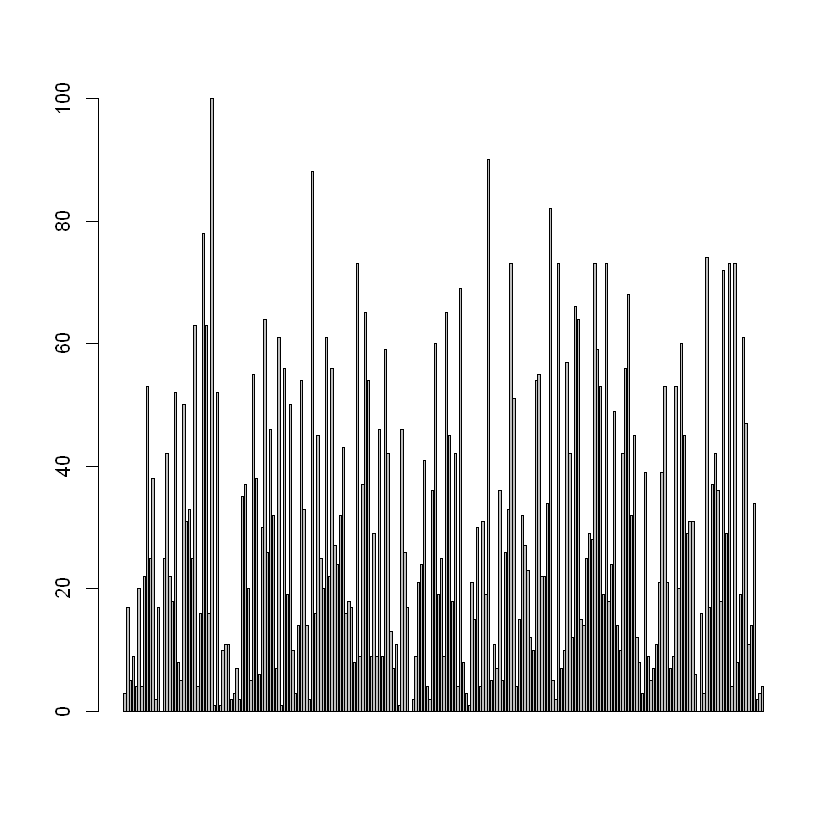

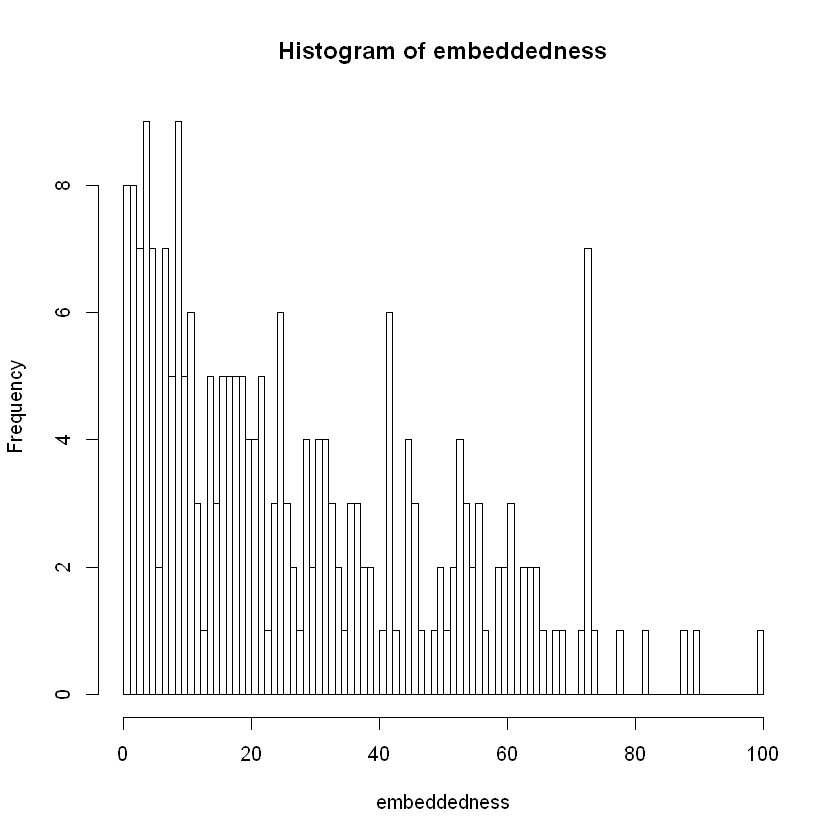

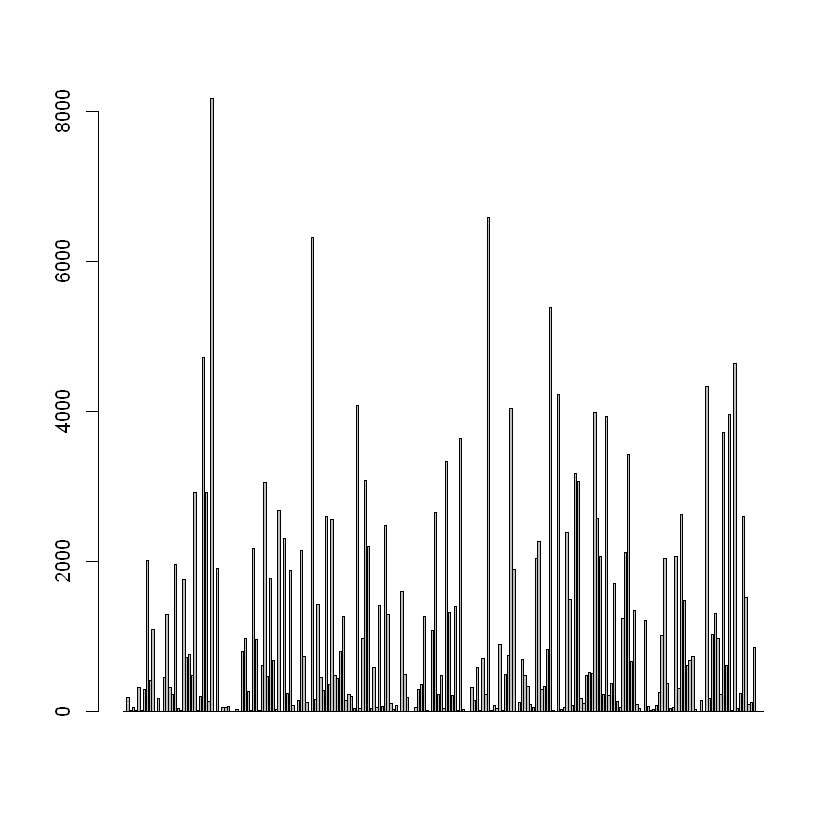

[1] "Fast Greedy for Core Node:  349"
Community sizes
  1   2   3   4   5 
107  11  98   4  10 
[1] "Modularity:"
[1] 0.2517149


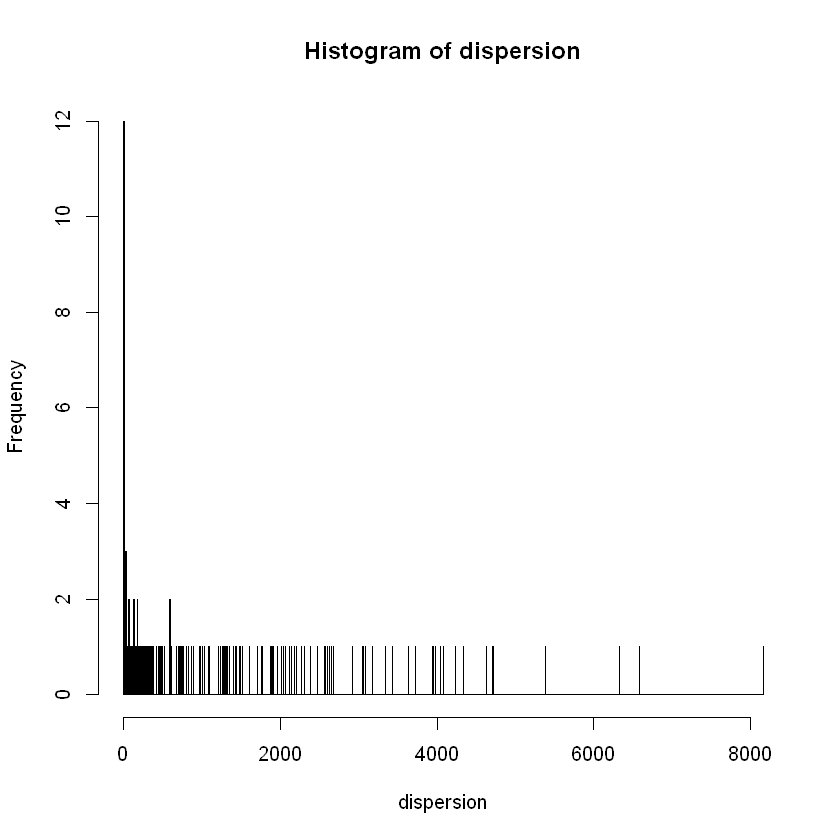

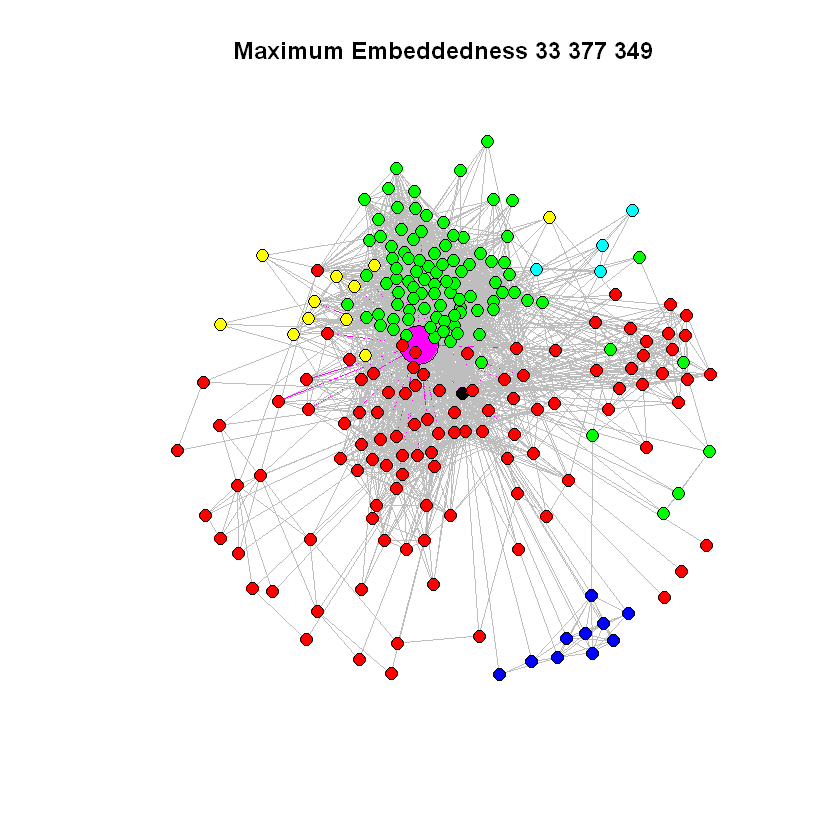

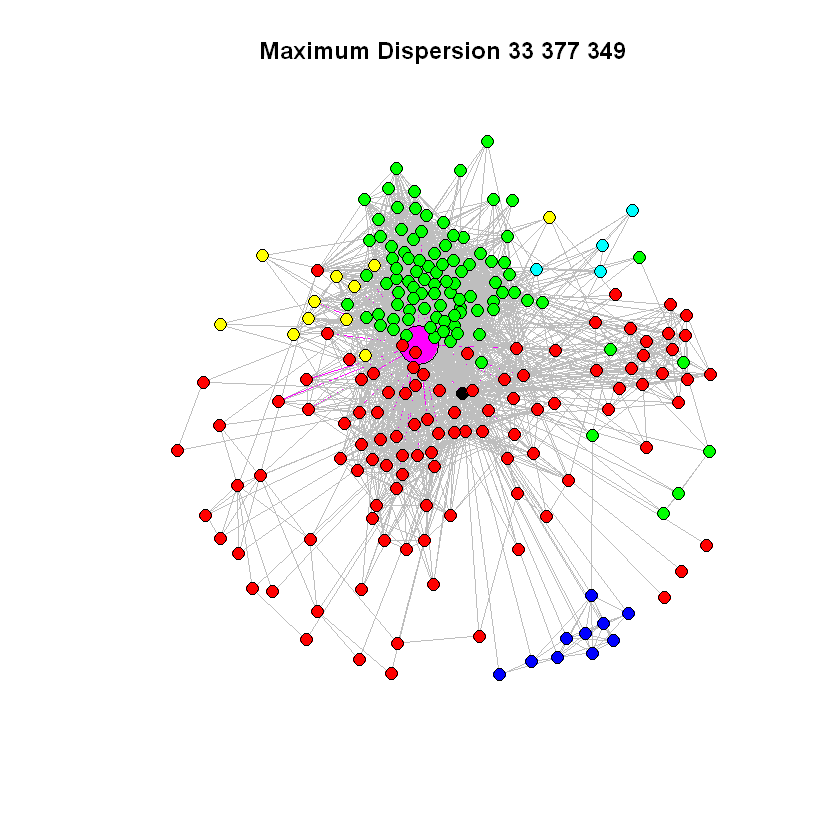

[1] "Max Embeddedness: 166"
[1] "Max Dispersion: 24644"
[1] "Max Ratio: 148.457831325301"


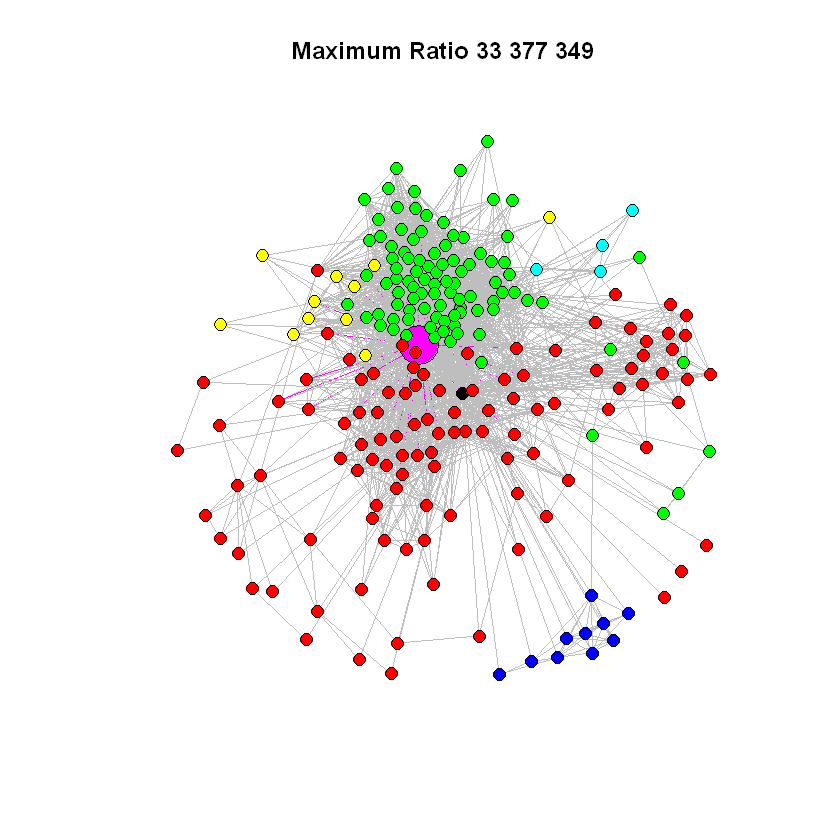

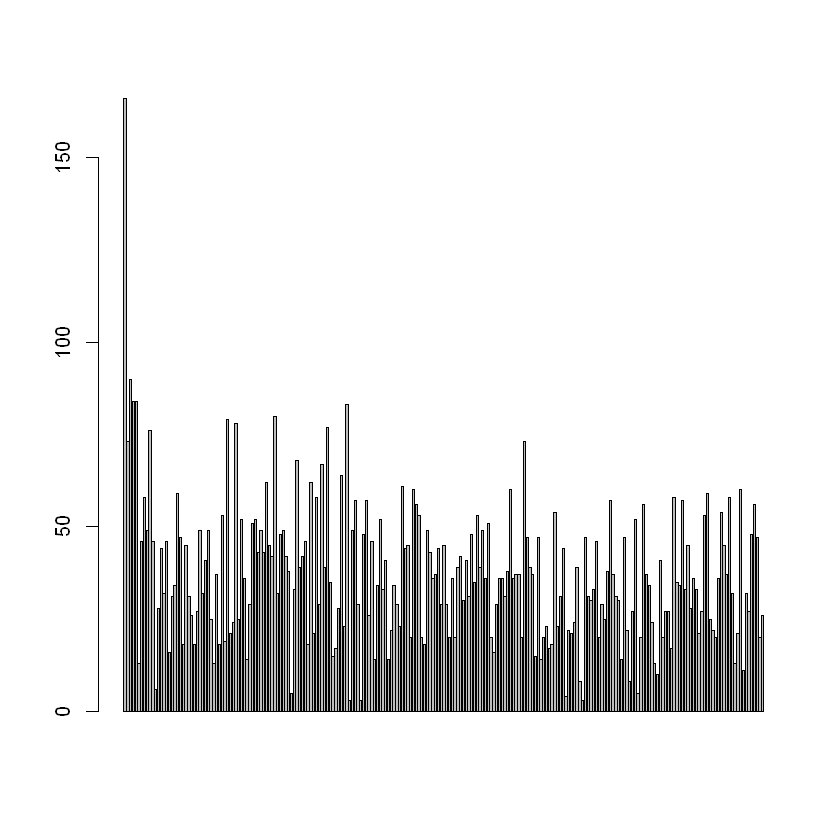

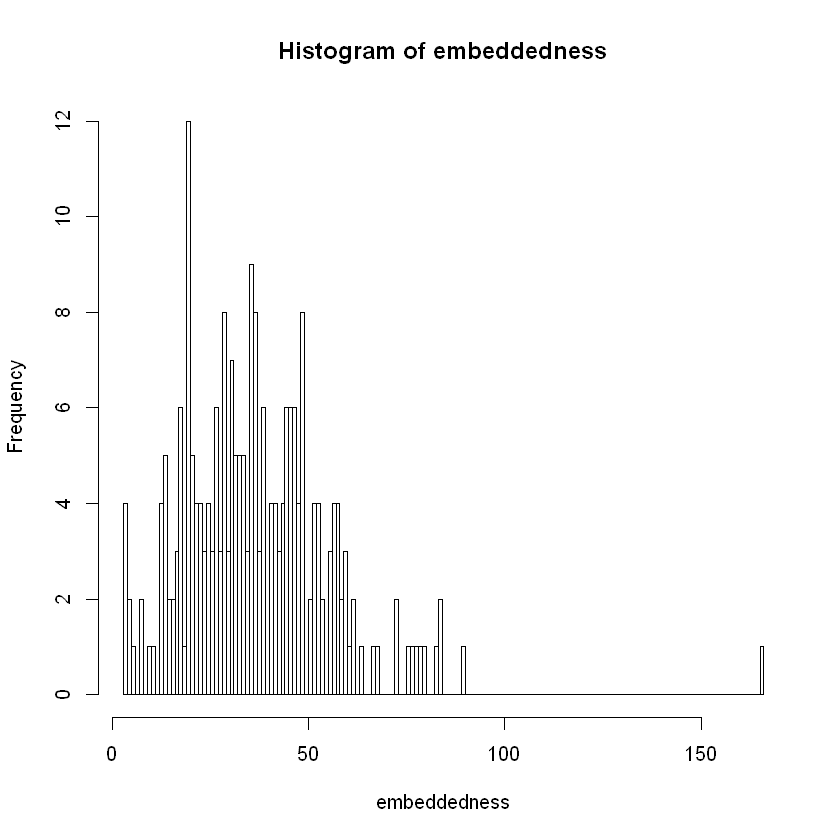

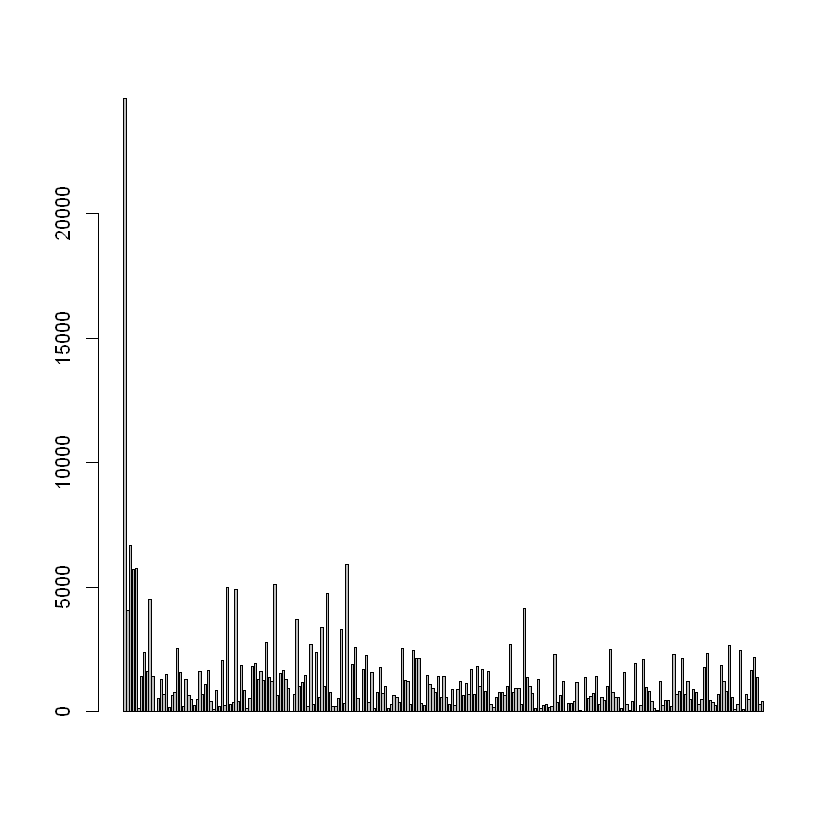

[1] "Fast Greedy for Core Node:  484"
Community sizes
 1  2  3 
71 72 89 
[1] "Modularity:"
[1] 0.5070016


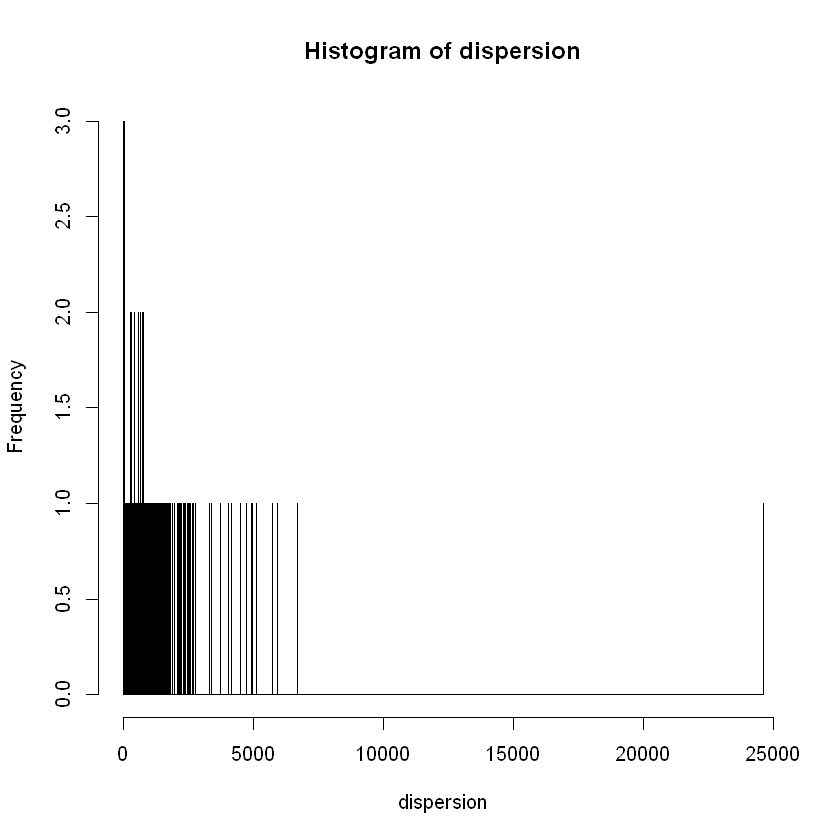

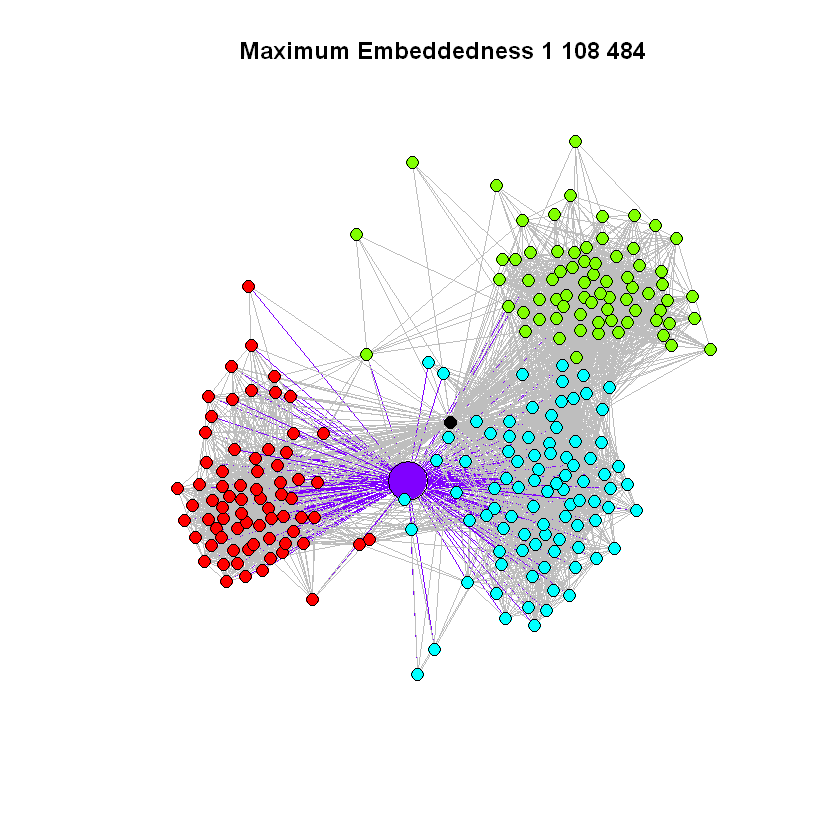

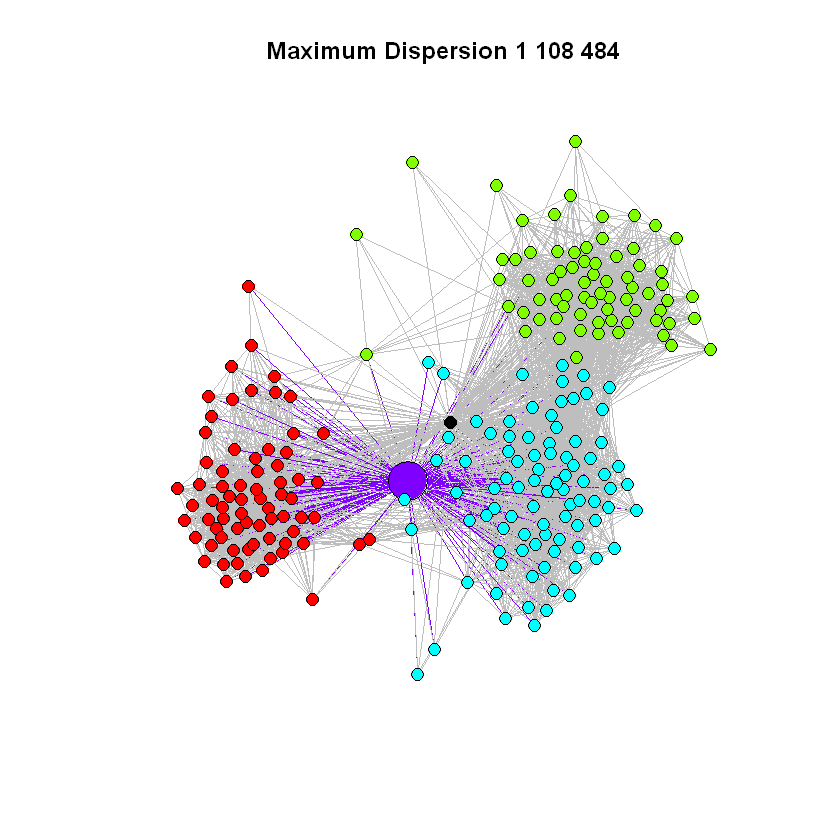

[1] "Max Embeddedness: 204"
[1] "Max Dispersion: 34412"
[1] "Max Ratio: 168.686274509804"


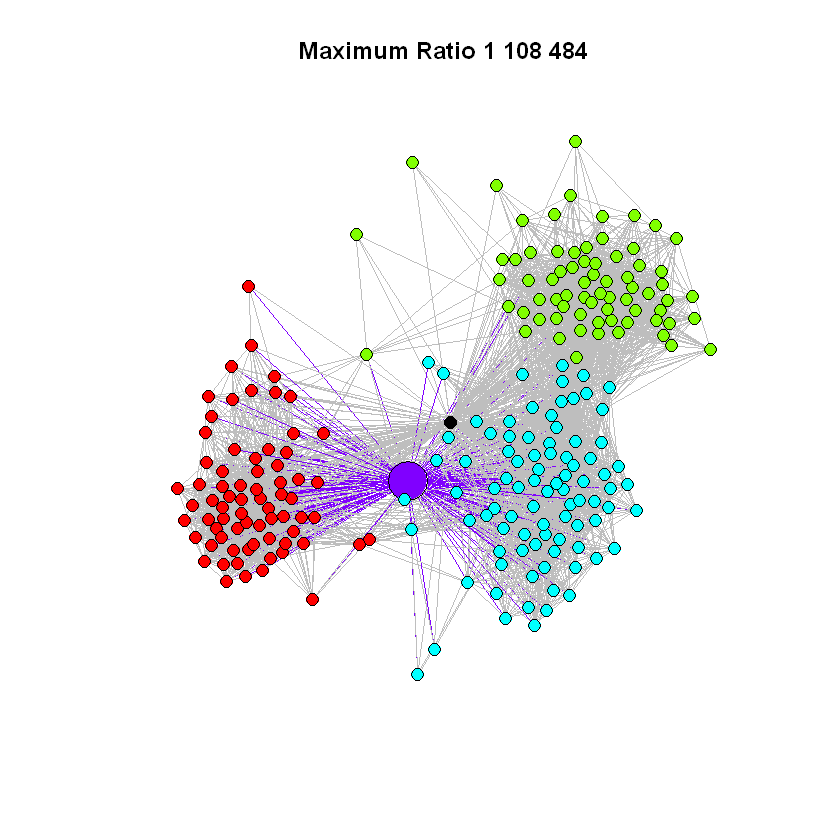

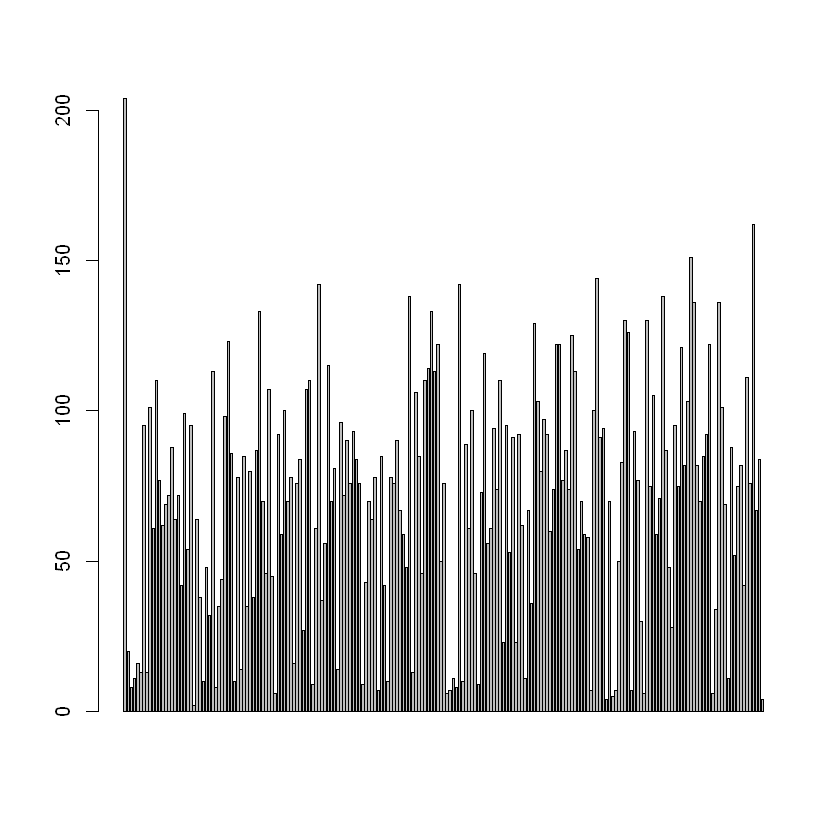

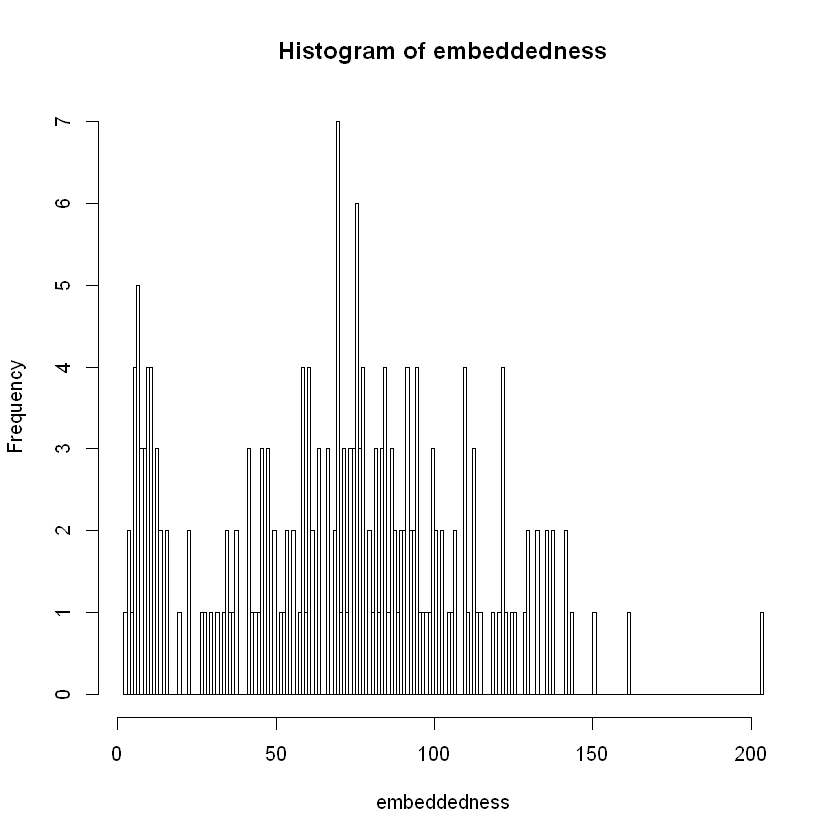

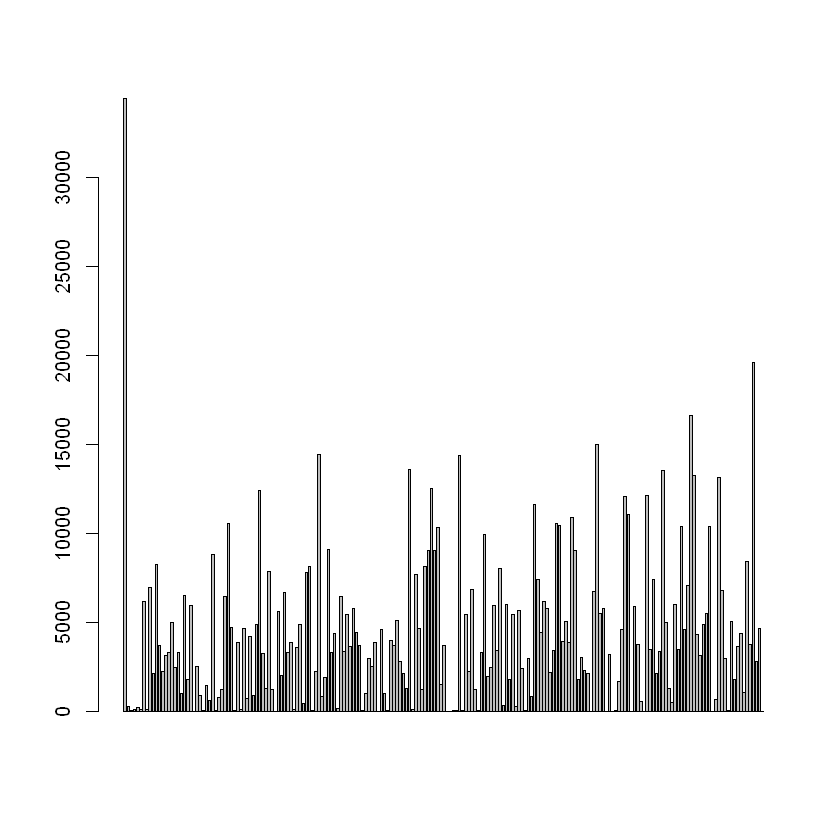

[1] "Fast Greedy for Core Node:  1087"
Community sizes
  1   2 
 81 125 
[1] "Modularity:"
[1] 0.1455315


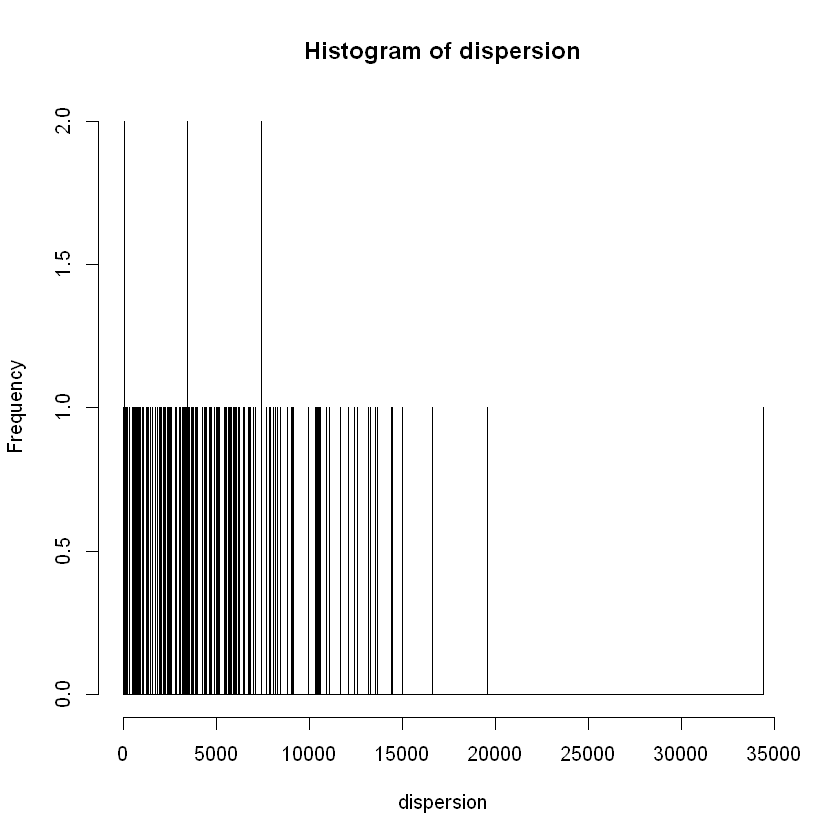

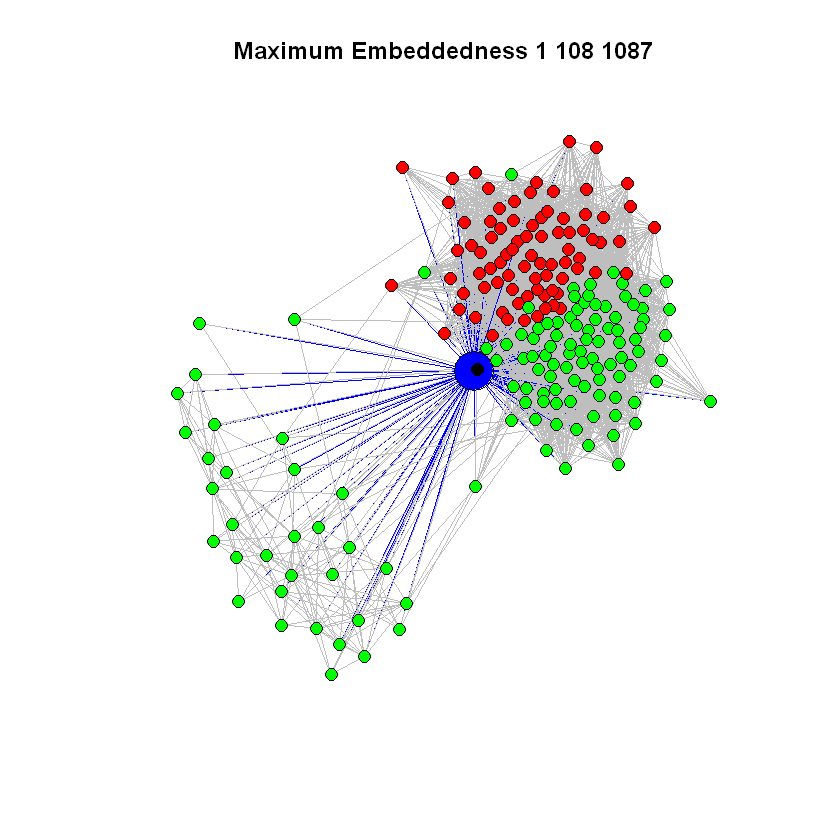

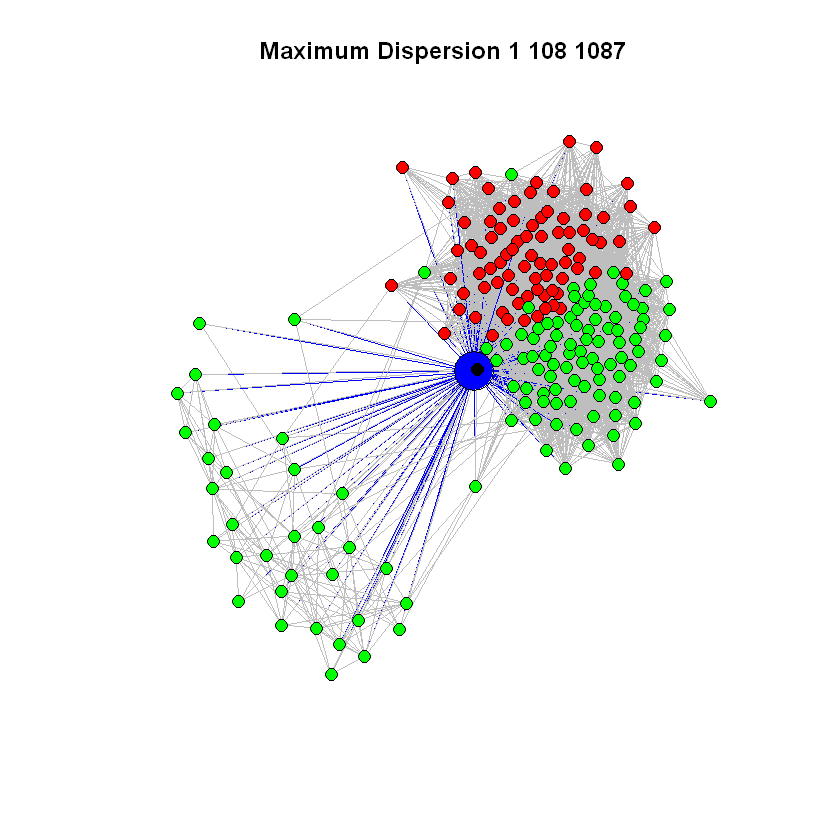

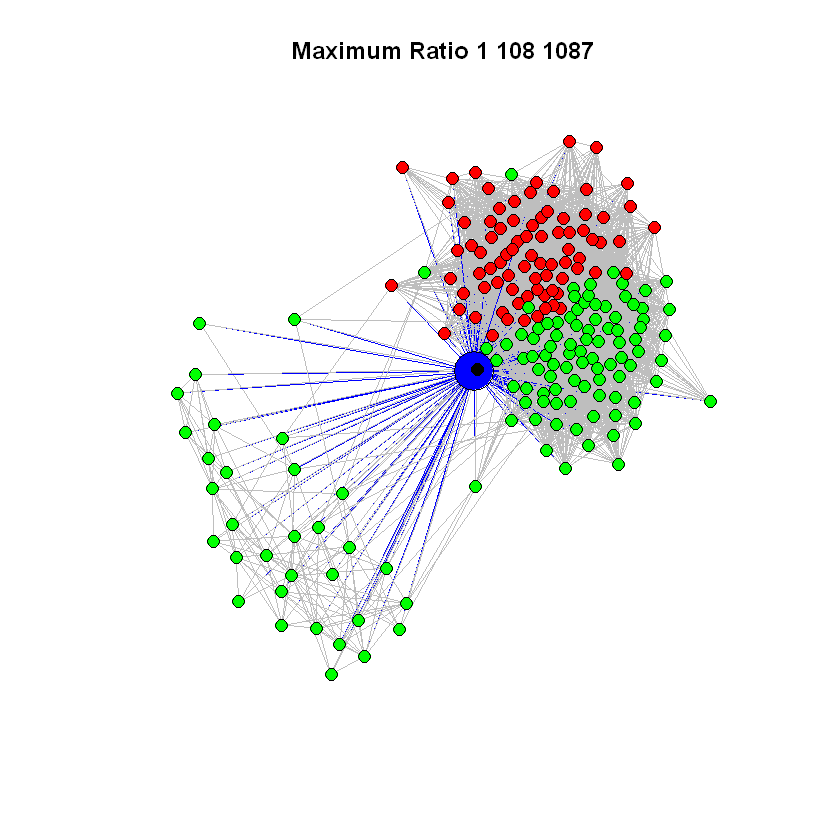

In [128]:
#alternate 12, 13, 14
coreNodeList = c(1, 108, 349, 484, 1087)
coreNodeList1 = c(1)
for(coreNode in coreNodeList){
    
    coreNodeNeighbors = fbAdList[[coreNode]]
    coreNodeNeighbors = as.list(coreNodeNeighbors)
    
    embeddedness = c()
    dispersion = c()
    maxEmbeddedness = -1
    maxDispersion = -1
    maxRatio = -1
    maxEmbeddednessNode = -1
    maxDispersionNode = -1
    maxRatioNode = -1
    
#     print(coreNodeNeighbors)
    for(neighbor in coreNodeNeighbors){
        eVal = 0
        neighborAdList = fbAdList[[neighbor]]
        neighborAdList = as.list(neighborAdList)
        
#         print(coreNodeNeighbors)
#         print(neighborAdList)
        mutualFriends = intersect(coreNodeNeighbors, neighborAdList)
        #print(mutualFriends)
        mutualFriends = unlist(mutualFriends)
        #print(mutualFriends)
        
        #embeddedness
        eVal = length(mutualFriends)
        embeddedness = c(embeddedness, eVal)
        
        if (eVal > maxEmbeddedness){
            maxEmbeddedness = eVal
            maxEmbeddednessNode = neighbor
#             print(mutualFriends)
#             print(len(coreNodeN))
            #print(paste(neighbor, eVal))
        }
        
        distance = 0
        if(eVal == 0){
            dispersion = c(dispersion, 0)
        }
        else{
            sortedFriends = sort(mutualFriends)
        
            for(i in 1:length(sortedFriends)){
                for(j in i:length(sortedFriends)){
                    dist = distMatrix[sortedFriends[i], sortedFriends[j]]
#                     print(i)
#                     print(j)
#                     print(dist)
                    if (is.finite(dist)){
                        distance = distance + dist
                    }else{
                        distance = distance + 3
                    }
            }
        }
        
            dispersion = c(dispersion, distance)
        }
        #dispersion
        #print(ul)
        
        
        if(distance > maxDispersion){
            maxDispersion = distance
            maxDispersionNode = neighbor
        }
        
        if(eVal == 0){
            ratio = 0
        }else{
            ratio = distance / eVal
        }
        
        
        if(ratio > maxRatio){
            maxRatio = ratio
            maxRatioNode = neighbor
        }
        
    }
    
    print(paste("Max Embeddedness:", maxEmbeddedness))
    print(paste("Max Dispersion:", maxDispersion))
    print(paste("Max Ratio:", maxRatio))
    
    
    barplot(embeddedness)
    hist(embeddedness, breaks = max(embeddedness))
    barplot(dispersion)
    hist(dispersion, breaks = max(dispersion))
    
    #print(typeof(coreNodeNeighbors))
    vertices = c(coreNodeNeighbors, coreNode)
    personalizedGraph = induced.subgraph(fbGraph, vertices)
    fgComm = fastgreedy.community(personalizedGraph)
    
    print(paste("Fast Greedy for Core Node: ", coreNode))
    print(sizes(fgComm))
    print("Modularity:")
    print(modularity(fgComm))
    
    colors = rainbow(max(membership(fgComm))+1)
    nodes_colors = colors[1:(length(colors)-1)]
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    coreNodeIndex = findIndex(personalizedGraph, coreNode)
    E(personalizedGraph)$color = 'grey'
    layout = layout.fruchterman.reingold(personalizedGraph)
    
    #max embeddedness
    
    emNode = findIndex(personalizedGraph, maxEmbeddednessNode)
    V(personalizedGraph)[emNode]$color = colors[length(colors)] 
    V(personalizedGraph)[emNode]$size = 15
    V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)[inc(emNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Embeddedness", emNode, maxEmbeddednessNode, coreNode))
    
    #max dispersion
    
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    disNode = findIndex(personalizedGraph, maxDispersionNode)
    V(personalizedGraph)[disNode]$color = colors[length(colors)] 
    V(personalizedGraph)[disNode]$size = 15
    V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)$color = 'grey'
    E(personalizedGraph)[inc(disNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Dispersion", disNode, maxDispersionNode, coreNode))
    
    #max ratio
    
    V(personalizedGraph)$color = nodes_colors[membership(fgComm)] 
    V(personalizedGraph)$size= 5
    ratioNode = findIndex(personalizedGraph, maxRatioNode)
    V(personalizedGraph)[ratioNode]$color = colors[length(colors)] 
    V(personalizedGraph)[ratioNode]$size = 15
    V(personalizedGraph)[coreNodeIndex]$color = 'black'
    E(personalizedGraph)$color = 'grey'
    E(personalizedGraph)[inc(ratioNode)]$color = colors[length(colors)]
    plot(personalizedGraph, layout = layout, vertex.label = NA, main=paste("Maximum Ratio", ratioNode, maxRatioNode, coreNode))
    
}

In [72]:
#15
#theoretical

In [11]:
#16
fbAdList = as_adj_list(fbGraph)


In [12]:
coreNode = 415
vertices = fbAdList[[coreNode]]
vertices = as.list(vertices)
vertices = c(vertices, coreNode)
# print(vertices)
personalizedGraph = induced.subgraph(fbGraph, vertices)
pgAdjList = as_adj_list(personalizedGraph)

userList = c()
for(node in 1:vcount(personalizedGraph)){
    V(personalizedGraph)[node]$degree = length(pgAdjList[[node]])
}
# list.vertex.attributes(personalizedGraph)
userList = which(V(personalizedGraph)$degree == 24)
paste("#16 |Nr| = ",length(userList))
userList
pgAdjList[[userList[[1]]]]
# #Output: [1] "name"      "real_name" "category"
# which(V(g)$real_name == "Peter")
# #Output: [1] 3
# V(g)$name[which(V(g)$real_name == "Peter")]
# #Output: [1] "A"

[1] "#16 |Nr| =  11"

[1]  31  53  75  90  93 102 118 133 134 136 137

+ 24/160 vertices, from e66946a:
 [1]   4   7   8   9  10  15  16  19  22  23  24  27  29  33  34  35  36  40  46
[20]  55  66 112 116 144

In [122]:
neighborhoodMeasure = function(Si, Sj, method, graph, adjList, i, j){
    if(method == "CommonNeighbors"){
        return (length(intersect(Si, Sj)))
    }
    else if(method == "Jaccard"){
        nume = length(intersect(Si, Sj))
        deno = length(union(Si, Sj))
        if(deno == 0)
            return (0)
        else
            return (nume/deno)
    }
    else if(method == "Jaccard2"){
        out = similarity(graph, c(i,j), mode="all", method = "jaccard")
        return (out)
    }
    else if(method == "AdamicAdar"){
#         adjList = as_adj_list(graph)
        sum = 0
        common = intersect(Si, Sj)
        for(k in common){
            Sk = adjList[[k]]
            if(length(Sk) == 0){
                sum = sum + 0
            }else{
                sum = sum + 1/(log(length(Sk)))
            }
        }
        return (sum)
    }
    else if (method == "AdamicAdar2"){
        out = similarity(graph, c(i,j), mode="all", method = "invlogweighted")
        return (out)
    }
}


In [129]:
friendRecommendation = function(graph, adjList, nodeIndex, t, measureMethod){
    recoList = c()
    recoListIdx = c()

#     adjList = as_adj_list(graph)
    allVertices = unlist(V(graph))
    
    # for 70% accuracy
    Si = adjList[[nodeIndex]]
    # for 80% accuracy
#     Si = unlist(neighborhood(graph, order = 1, nodes = nodeIndex))
    Sic = unlist(setdiff(allVertices, Si))
    Sic = Sic[which(Sic != nodeIndex)]
    
    for(j in Sic){
        # for 70% accuracy
        Sj = adjList[[j]]
        # for 80% accuracy
#         Sj = unlist(neighborhood(graph, order = 1, nodes = j))
        measure = neighborhoodMeasure(Si, Sj, measureMethod, graph, adjList, nodeIndex, j)
        recoListIdx = c(recoListIdx, j)
        recoList = c(recoList, measure)
    }
#     print(recoList)
#     print(recoListIdx)
    recoFriendMeasureIdx = sort(recoList, index.return=TRUE, decreasing=TRUE)$ix
#     print(recoFriendMeasureIdx)
    recoFriends = recoListIdx[recoFriendMeasureIdx]    
    
    return (recoFriends[1:t])
}

In [134]:
#17
neighborhoodMeasureMethods = c("CommonNeighbors", "Jaccard", "AdamicAdar")
# neighborhoodMeasureMethods = c("CommonNeighbors")
userList1 = c(53)
for(measureMethod in neighborhoodMeasureMethods){
    print(measureMethod)
    algoAcc = c()
    for(user in userList){
            cat(paste("User #",user))
            userAcc = c()
            for(itr in 1:10){
                # edge based method

#                 userEdges = E(personalizedGraph)[inc(user)]
# #                 print(length(userEdges))
# #                 beta = c()
# #                 for(i in 1:length(userEdges)){
# #                     alpha = sample(1:100,1)
# #                     if(alpha <= 25){
# #                         beta = c(beta, i)
# #                     }
# #                 }
#                 alpha = sample(1:100,length(userEdges),replace=TRUE)
#                 beta = which(alpha <= 25, arr.ind=T)
#                 removeEdges = userEdges[beta]
#                 edgeEnds = ends(personalizedGraph, removeEdges)
#                 Ri = unique(c(edgeEnds))
#                 Ri = Ri[which(Ri != user)]
#                 t = length(Ri)
#                 newGraph = delete_edges(personalizedGraph, removeEdges)
                
                # vertex based method
                neighbors = pgAdjList[[user]]
                alpha = sample(1:100, 24, replace=TRUE)
                beta = which(alpha <= 25, arr.ind=T)
                Ri = neighbors[beta]
                newGraph = personalizedGraph
                for(n in Ri){
                    newGraph = delete_edges(newGraph, paste(toString(user),"|",toString(n),sep = ""))
                }
                t = length(Ri)
                
                newAdjList = as_adj_list(newGraph)

                Pi = friendRecommendation(newGraph, newAdjList, user, t, measureMethod)
#                 print("Ri")
#                 print(Ri)
#                 print("Pi")
#                 print(Pi)
                acc = (length(intersect(Ri, Pi)))/(length(Ri))
    #             print(paste("Acc=",acc))
                userAcc = c(userAcc, acc)            
            }
            userAvg = mean(userAcc)
            cat(paste("\tUserAvgAcc:",userAvg,"\n"))
            algoAcc = c(algoAcc, userAvg)
    }
    algoAvg = mean(algoAcc)
    cat(paste("\n",measureMethod, "\t",algoAvg,"\n\n\n"))
}

[1] "CommonNeighbors"
User # 31	UserAvgAcc: 0.281666666666667 
User # 53	UserAvgAcc: 1 
User # 75	UserAvgAcc: 0.945714285714286 
User # 90	UserAvgAcc: 0.847853535353535 
User # 93	UserAvgAcc: 0.386547619047619 
User # 102	UserAvgAcc: 1 
User # 118	UserAvgAcc: 0.787222222222222 
User # 133	UserAvgAcc: 0.935555555555556 
User # 134	UserAvgAcc: 0.985714285714286 
User # 136	UserAvgAcc: 0.866428571428571 
User # 137	UserAvgAcc: 0.952380952380952 

 CommonNeighbors 	 0.817189426734881 


[1] "Jaccard"
User # 31	UserAvgAcc: 0.169246031746032 
User # 53	UserAvgAcc: 0.975714285714286 
User # 75	UserAvgAcc: 0.898095238095238 
User # 90	UserAvgAcc: 0.811150793650794 
User # 93	UserAvgAcc: 0.530595238095238 
User # 102	UserAvgAcc: 0.918095238095238 
User # 118	UserAvgAcc: 0.859004329004329 
User # 133	UserAvgAcc: 0.985714285714286 
User # 134	UserAvgAcc: 0.948214285714286 
User # 136	UserAvgAcc: 0.886150793650794 
User # 137	UserAvgAcc: 0.918214285714286 

 Jaccard 	 0.809108618654073 


[1] "Ada

## END OF NOTEBOOK